<a href="https://colab.research.google.com/github/cristianscu99-VIU/03MIAR_Algoritmos-de-Optimizacion/blob/main/FuerzaBruta_Proyecto_AOP_Problema_2_Cristian_de_la_Santa_Cruz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos: **Cristian de la Santa Cruz Urbano**   <br>
Url: https://github.com/cristianscu99-VIU/03MIAR_Algoritmos-de-Optimizacion/tree/main/SEMINARIO<br>
Problema:
> 1. Sesiones de doblaje <br>
>2. **Organizar los horarios de partidos de La Liga**<br>
>3. Combinar cifras y operaciones

**Descripción del problema:**

- Desde la La Liga de fútbol profesional se pretende organizar los horarios de los partidos de liga de cada jornada. Se conocen algunos datos que nos deben llevar a diseñar un algoritmo que realice la asignación de los partidos a los horarios de forma que maximice la audiencia.

- Los horarios disponibles se conocen a priori y son los siguientes:


In [ ]:
# @title
  Ponderacion = {'V20': 0.4, 'S12' : 0.55, 'S16' : 0.7, 'S18' : 0.8,
                 'S20' : 1, 'D12' : 0.45, 'D16' : 0.75, 'D18' : 0.85,
                 'D20' : 1, 'L20' : 0.4}
  listado_horarios = list(Ponderacion.keys())
  listado_horarios

['V20', 'S12', 'S16', 'S18', 'S20', 'D12', 'D16', 'D18', 'D20', 'L20']

- En primer lugar se clasifican los equipos en tres categorías según el numero de seguidores( que tiene relación directa con la audiencia). Hay 3 equiposen la categoría A,11 equiposde categoría By 6 equiposde categoría C.

- Se conoce estadísticamente la audiencia que genera cada partido según los equipos que se enfrentan y en horario de sábado a las 20h (el mejor en todos los casos)

In [ ]:
# @title
  import pandas as pd
  audiencia_base = {
      'A' : {'A' : 2},
      'B' : {'A' : 1.3, 'B' : 0.9},
      'C' : {'A' : 1, 'B' : 0.75, 'C' : 0.47}
  }
  df = pd.DataFrame(audiencia_base)
  display(df)

,A,B,C
A,2.0,1.3,1.00
B,NaN,0.9,0.75
C,NaN,NaN,0.47


- Si el horario del partido no se realiza a las 20 horas del sábado se sabe que se reduce según los coeficientes de la siguiente tabla
- Debemos asignar obligatoriamente siempre un partido el viernes y un partido el lunes

In [ ]:
# @title
Ponderacion = {'Viernes' : {'20h' : 0.4},
             'Sábado' : {'12h' : 0.55, '16h' : 0.7, '18h' : 0.8, '20h' : 1},
             'Domingo' : {'12h' : 0.45, '16h' : 0.75, '18h' : 0.85, '20h' : 1},
             'Lunes' : {'20h' : 0.4}
             }
Ponderacion = pd.DataFrame(Ponderacion).sort_index(ascending=True)
display(Ponderacion)

,Viernes,Sábado,Domingo,Lunes
12h,NaN,0.55,0.45,NaN
16h,NaN,0.70,0.75,NaN
18h,NaN,0.80,0.85,NaN
20h,0.4,1.00,1.00,0.4


- Es posible la coincidencia de horarios pero en este caso la audiencia de cada partido se verá afectada y se estima que se reduce en porcentaje según la siguiente tabla dependiendo del número de coincidencias:

In [ ]:
# @title
Coincidencias = {'-%' : [0, 0.25, 0.45, 0.6, 0.7, 0.75, 0.78, 0.8, 0.8]}

df_Coincidencias = pd.DataFrame(Coincidencias)
df_Coincidencias.columns.name='Coincidencias'
display(df_Coincidencias)

Coincidencias,-%
0,0.00
1,0.25
2,0.45
3,0.60
4,0.70
5,0.75
6,0.78
7,0.80
8,0.80


- Los cálculos asociados a una jornada de ejemplo se realizan según se muestra en la siguiente tabla:

In [ ]:
# @title
import random
import numpy as np
import pandas as pd

dict_equipos = {'Celta' : 'B', 'Real Madrid' : 'A', 'Valencia' : 'B', 'R.Sociedad' : 'A', 'Mallorca' : 'C', 'Eibar' : 'C',
           'Athletic' : 'B', 'Barcelona' : 'A', 'Leganés' : 'C', 'Osasuna' : 'C', 'Villareal' : 'B', 'Granada' : 'C',
           'Alavés' : 'B', 'Levante' : 'B', 'Espayol' : 'B', 'Sevilla' : 'B', 'Betis' : 'B', 'Valladolid' : 'C', 'Atlético' : 'B',
           'Getafe' : 'B'
           }

def Correcion_por_coincidencia(lista_horario_partido): # devuelve una lista con las diferentes correciones en base a la coincidencia
  Coincidencias = {'-%' : [0, 0.25, 0.45, 0.6, 0.7, 0.75, 0.78, 0.8, 0.8]}
  lista_correciones = []

  for hora in lista_horario_partido:
    contador = lista_horario_partido.count(hora) - 1
    lista_correciones.append(Coincidencias['-%'][contador])
  return lista_correciones

def generar_partidos (dict_equipos):
  "Función que devuelve los partidos que se van a jugar"
  lista_partidos = [] # lista que guarda los distintos partidos de una jornada
  lista_categorias = [] # lista que guarda las distintas categorias de los partidos de una jornada
  lista_bases = [] # lista con las bases de audiencia de cada partido en funcion de la categoría
  lista_equipos = list(dict_equipos.keys()) #lista con todos los equipos
  lista_equipos_disponibles = lista_equipos[:]

  lista_partidos = [
      'Celta - Real Madrid',
      'Valencia - R.Sociedad',
      'Mallorca - Eibar',
      'Athletic - Barcelona',
      'Leganés - Osasuna',
      'Villareal - Granada',
      'Alavés - Levante',
      'Espayol - Sevilla',
      'Betis - Valladolid',
      'Atlético - Getafe',
  ]

  lista_categorias = [
      'B-A', 'B-A', 'C-C', 'B-A', 'C-C', 'B-C', 'B-B', 'B-B', 'B-C', 'B-B'
  ]

  lista_bases = [
      1.3, 1.3, 0.47, 1.3, 0.47, 0.75, 0.9, 0.9, 0.75, 0.9
  ]


  Ponderacion = {'V20': 0.4, 'S12' : 0.55, 'S16' : 0.7, 'S18' : 0.8,
                 'S20' : 1, 'D12' : 0.45, 'D16' : 0.75, 'D18' : 0.85,
                 'D20' : 1, 'L20' : 0.4}

  listado_horarios = list(Ponderacion.keys())

  lista_horario_partido = [
      'V20', 'S12', 'S16', 'S18', 'S20', 'D16', 'D16', 'D18', 'D20', 'L20'
  ]

  lista_ponderaciones = [Ponderacion[lista_horario_partido[i]] for i in range(len(lista_horario_partido))]

  return lista_partidos, lista_categorias, lista_bases, lista_horario_partido, lista_ponderaciones

lista_partidos, lista_categorias, lista_bases, lista_horario_partido, lista_ponderaciones = generar_partidos(dict_equipos)
lista_base_ponderacion = np.array(lista_bases)*np.array(lista_ponderaciones)
lista_correciones = np.array(Correcion_por_coincidencia(lista_horario_partido))
lista_correciones_corregida = lista_base_ponderacion*(1-lista_correciones)

dict_jornada = {
    'Partido' : lista_partidos,
    'Categorías' : lista_categorias,
    'Horario' : lista_horario_partido,
    'Base(Mill.)' : lista_bases,
    'Ponderación' : lista_ponderaciones,
    'Base*Ponderación' : lista_base_ponderacion,
    'Correción Coincidencia' : lista_correciones_corregida,
}

df_jornada = pd.DataFrame(dict_jornada)
display(df_jornada)
Total = np.sum(lista_correciones_corregida)
print('\n Total: ',Total)

,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,V20,1.30,0.40,0.5200,0.520000
1,Valencia - R.Sociedad,B-A,S12,1.30,0.55,0.7150,0.715000
2,Mallorca - Eibar,C-C,S16,0.47,0.70,0.3290,0.329000
3,Athletic - Barcelona,B-A,S18,1.30,0.80,1.0400,1.040000
4,Leganés - Osasuna,C-C,S20,0.47,1.00,0.4700,0.470000
5,Villareal - Granada,B-C,D16,0.75,0.75,0.5625,0.421875
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.506250
7,Espayol - Sevilla,B-B,D18,0.90,0.85,0.7650,0.765000
8,Betis - Valladolid,B-C,D20,0.75,1.00,0.7500,0.750000
9,Atlético - Getafe,B-B,L20,0.90,0.40,0.3600,0.360000



 Total:  5.877125


# Preguntas

**(*) ¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>**



**¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.**

Respuesta
Teniendo en cuenta que el problema se acota para una única jornada

- a) Cómo la cantidad de partidos es P = 10 y la cantidad de horarios distintos es H = 10, tenemos que H^P = 10^10 = 1*10^10, es decir, 10 mil millones de distintas combinaciones posibles (teniendo en cuenta repeticiones de horario).

> Se trata de una combinatoria de **VARIACIONES CON REPETICIÓN** de H elementos tomados de P en P: posibles muestras ordenadas de P elementos no necesariamente distintos que se pueden extraer de un conjunto de H elementos.

$$
VR_{H}^{P} = H^{P} = 10^{10}
$$



- b) Sabiendo que las restricciones son que obligatoriamente debe haber al menos un partido el Viernes y otro partido el Lunes y se corresponden con el primer y último horario respectivamente. Tenemos que la cantidad de soluciones a calcular sería alrededor de 4 mil 100 millones de combinaciones posibles. **Se trata de Variaciones con repetición con restricciones, aplicando el principio de inclusión-exclusión.**


$$
VR_{H}^{P} - VR_{H-1}^{P} - VR_{H-1}^{P} + VR_{H-2}^{P}= H^{P} = H^{P} - A - B + A \cap B = 4100173022
$$

- **Siendo A el conjunto formado por las combinaciones que no contienen el primer horario y B el conjunto formado por las combinaciones que no contienen el último horario.**

In [ ]:
H = 10 # Cantidad de horarios distintos. H = len(listado_horarios)
P = 10 # Cantidad de partidos distintos en una jornada. P = len(lista_partidos)
print(f'a) Combinatoria sin restricciones: {H**P}')
print(f'\nb) Combinatoria con restricciones:{H**P} - {(H-1)**P} - {(H-1)**P} + {(H-2)**P} = {H**P - (H-1)**P - (H-1)**P + (H-2)**P}')

a) Combinatoria sin restricciones: 10000000000

b) Combinatoria con restricciones:10000000000 - 3486784401 - 3486784401 + 1073741824 = 4100173022


Explicación:

Para calcular el número de posibles soluciones es necesario calcular a través de combinatoria la cantidad de situaciones diferentes a evaluar.
- **Sin restrincciones:**
Suponiendo que tengamos P partidos en 1 jornada, y H horarios diferentes posibles para poder jugar cada partido. Tendríamos que ir evaluando el resultado de la audiencia de esa jornada para cada partido. Cada partido tiene H horarios diferentes en los que poder jugar.
Supongamos el caso en que P = 3 y H = 3

In [1]:
# @title
from itertools import product

P = 3
H = 3

# Generar todas las combinaciones de P números del 0 a H-1
matriz = list(product(range(H), repeat=P))

print(f'La cantidad de combinaciones diferentes de horarios entre partidos es {len(matriz)}'
      f'\nque es lo mismo que la combinatoria H^(P), es decir {H}^{P} = {H**P}. \n\n Combinatoria:')
matriz

La cantidad de combinaciones diferentes de horarios entre partidos es 27
que es lo mismo que la combinatoria H^(P), es decir 3^3 = 27. 

 Combinatoria:


[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

- **Con restricciones:** Teniendo en cuenta todas las restricciones, tendríamos que analizar todas aquellas posibles soluciones que contengan como partida al menos 1 partido en el primer horario (Viernes) y un partido en el último horario (Lunes). Suponemos P=3 y H=3.

In [2]:
from itertools import product

P = 3
H = 3

# Generar todas las combinaciones de P números del 0 a H-1
matriz = list(product(range(H), repeat=P))
matriz_restringida = [tuple for tuple in matriz if (0 in tuple and H-1 in tuple)]

print(f'La cantidad de combinaciones diferentes de horarios entre partidos con restricciones es {len(matriz_restringida)}.'
      f'\nQue es lo mismo que la combinatoria H^(P) - A - B + AintersecciónB,'
      f'\nsiendo A el conjunto formado por las filas que no contienen el primer horario'
      f'\ny B el conjunto formado por las filas que no contienen el último horario, es decir:'
      f'\nH = {[i for i in range(H)]}, A = {H-1}^P (A es subconjunto de H que no tiene 0) y de la misma forma,'
      f'\nB = {H-1}^P (B es subconjunto de H que no tiene {H-1}) y'
      f'\nAintersecciónB = {H-2}^P (AintersecciónB es subconjunto de H que no tiene 0 ni {H-1})'
      f'\nPor tanto: H^(P) - A - B + AintersecciónB = {H**P}-{(H-1)**P}-{(H-1)**P}+{(H-2)**P} = {H**P-2*(H-1)**P+(H-2)**P} \n\n Combinatoria:')

matriz_restringida

La cantidad de combinaciones diferentes de horarios entre partidos con restricciones es 12.
Que es lo mismo que la combinatoria H^(P) - A - B + AintersecciónB,
siendo A el conjunto formado por las filas que no contienen el primer horario
y B el conjunto formado por las filas que no contienen el último horario, es decir:
H = [0, 1, 2], A = 2^P (A es subconjunto de H que no tiene 0) y de la misma forma,
B = 2^P (B es subconjunto de H que no tiene 2) y
AintersecciónB = 1^P (AintersecciónB es subconjunto de H que no tiene 0 ni 2)
Por tanto: H^(P) - A - B + AintersecciónB = 27-8-8+1 = 12 

 Combinatoria:


[(0, 0, 2),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 2),
 (1, 2, 0),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 2, 0)]

**Modelo para el espacio de soluciones**<br>
**(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguméntalo)**

Respuesta

En un primer escenario he propuesto la siguiente estructuras de datos:
- Diccionarios : dict_equipos, Coincidencias (que luego lo convertí a una lista para mayor performance).
- Listas : lista_partidos, lista_categorias, lista_bases, lista_horario_partido, lista_ponderaciones, lista_base_ponderacion,lista_correciones, lista_correciones_corregida.
- DataFrames : df_jornada

Debido a la gran cantidad de datos a manejar lo mejor era vectorizar y hacer operaciones con numpy, por tanto las listas ahora son np.arrays y la combinatoria no se guarda porque sería excesivo, no hay estructura que soporte tal cantidad de datos (*ver celda inferior*). Usar otra codificación que implique un menor uso de memoria no sería eficiente puesto que por la arquitectura del pocesador ralentizaría el proceso aún más.

In [ ]:
import sys
import math

H=10
P=10

t = tuple(range(P))
size = sys.getsizeof(t) + sum(sys.getsizeof(i) for i in t)

print(size*(H**P-2*(H-1)**P+(H-2)**P)/(2**30)) # Fuerza bruta GB

1527.4334780871868


Se puede observar que **el simple almacenamiento de todas las combinaciones posibles** nos ocuparía un espacio total de 1.5 TB, si Terabytes. Con lo cual, guardarlo en memoria sería inviable.

Por tanto, y respondiendo a la pregunta de cual es el modelo para el espacio de soluciones, principalmente el algoritmo lo que hace es generar una combinación que es sobre la que se va a resolver el problema, dado que tendríamos tantos cálculos de audiencias como combinaciones hemos de analizar, solo nos quedamos con el valor del total de audiencia si supera el maximo ya encontrado en alguna combinación anterior y se guarda en la variable **Total_max**, por otra parte también se guarda las diferentes combinaciones de horarios que dan ese máximo en una lista de soluciones llamada **horario_max_audiencia**.

**Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?**

**(*)¿Es un problema de maximización o minimización?**

Respuesta

La función objetivo es el **cálculo de la audiencia** (suma de todas las audiencias de cada partido) **en base a la organización horaria** de los partidos (lista_horario_partido).

Se trata de un problema de **maximización de audiencia**. Dicho problema se ve afectado por las diferentes ponderaciones de horarios, correciones por coincidencia de horarios y calidad de los enfrentamientos.

**Diseña un algoritmo para resolver el problema por fuerza bruta**

In [ ]:
def problema_fuerza_bruta():
  import numpy as np
  import pandas as pd
  from itertools import product
  import time
  from collections import Counter

  # Condiciones iniciales para un problema fijo (P = PARTIDOS, H = HORARIOS)
  #############################################
  #        PROBLEMA P = 10 H = 10             #
  #############################################

  lista_partidos = [
  'Celta - Real Madrid',
  'Valencia - R.Sociedad',
  'Mallorca - Eibar',
  'Athletic - Barcelona',
  'Leganés - Osasuna',
  'Villareal - Granada',
  'Alavés - Levante',
  'Espayol - Sevilla',
  'Betis - Valladolid',
  'Atlético - Getafe',
  ]

  lista_categorias = ['B-A', 'B-A', 'C-C', 'B-A', 'C-C', 'B-C', 'B-B', 'B-B', 'B-C', 'B-B']

  lista_bases = [1.3, 1.3, 0.47, 1.3, 0.47, 0.75, 0.9, 0.9, 0.75, 0.9]

  Ponderacion = {'V20': 0.4, 'S12' : 0.55, 'S16' : 0.7, 'S18' : 0.8,
                  'S20' : 1, 'D12' : 0.45, 'D16' : 0.75, 'D18' : 0.85,
                  'D20' : 1, 'L20' : 0.4}

  ##############################################

  # Función que devuelve una lista con las diferentes correciones en base a la coincidencia
  def Correcion_por_coincidencia(lista_horario_partido):
      #Coincidencias = {'-%' : [0, 0.25, 0.45, 0.6, 0.7, 0.75, 0.78, 0.8, 0.8]} cogemos directamente la lista para no llamar al diccionario (performance)
      correcciones = [0, 0.25, 0.45, 0.6, 0.7, 0.75, 0.78, 0.8, 0.8]
      contador = Counter(lista_horario_partido)

      # Aplicar la corrección correspondiente a cada valor
      lista_correciones = [correcciones[min(contador[hora] - 1, len(correcciones) - 1)] for hora in lista_horario_partido]

      return np.array(lista_correciones)

  # Función que genera dataframe
  def generar_dataframe(lista_partidos: list, lista_categorias: list, lista_horario_partido:list, lista_bases: list, lista_ponderaciones:list, lista_base_ponderacion:list, lista_correciones_corregida:list ):

    dict_jornada = {
        'Partido' : lista_partidos,
        'Categorías' : lista_categorias,
        'Horario' : lista_horario_partido,
        'Base(Mill.)' : lista_bases,
        'Ponderación' : lista_ponderaciones,
        'Base*Ponderación' : lista_base_ponderacion,
        'Correción Coincidencia' : lista_correciones_corregida,
    }

    df_jornada = pd.DataFrame(dict_jornada)
    return df_jornada

  # Función que genera combinación con restrincciones (4.100 M de combinaciones)
  def combinaciones_validas(P, H):
      for comb in product(range(H), repeat=P):
          if 0 in comb and (H - 1) in comb:
              yield comb


  # Resolución del problema por fuerza bruta

  # Declaración de Variables
  Total_max = 0 # Valor incial de Audiencia
  horario_max_audiencia = [] # Lista de horarios que generan la máx Audiencia

  listado_horarios = list(Ponderacion.keys()) # Definimos los horarios [V20, S12, S16...]

  # Combinatoria
  P = len(lista_partidos) # Cantidad de Partidos
  H = len(listado_horarios) # Cantidad de Horarios
  combinaciones_totales = (H**P - (H-1)**P - (H-1)**P + (H-2)**P) # Combinaciones posibles

  # Generador de combinaciones teniendo en cuentra restrincciones gen ira siendo cada una de las 4.100 M de combinaciones
  gen = combinaciones_validas(P, H)

  start_time = time.time()  # Inicia temporizador para estimar tiempos de ejecución

  # Cálculo de la audiencia para cada combinación posible (FUERZA BRUTA)
  for i, fila in enumerate(gen):
    fila_array = np.array(fila)
    lista_horario_partido = np.array(listado_horarios)[fila_array] # Array con los horarios a analizar para la jornada
    lista_ponderaciones = np.array([Ponderacion[h] for h in lista_horario_partido]) # Array con las ponderaciones para cada partido según su horario
    lista_base_ponderacion = np.array(lista_bases)*lista_ponderaciones # Array con la audiencia base modificada por el efecto de la ponderación del horario
    lista_correciones = Correcion_por_coincidencia(lista_horario_partido) # Array con las correciones por coincidencia a aplicar a lista_base_ponderacion (Reparto de audiencia por solapamiento)
    lista_correciones_corregida = lista_base_ponderacion*(1-lista_correciones) # Array con las audiencias finales por partido
    Total = np.sum(lista_correciones_corregida) # Valor de Audiencia Total para la combinación 'gen' (generada) [0,0,0,0,0,0,0,0,0,0] hasta [9,9,9,9,9,9,9,9,9,9] 4.100 M de combinaciones

    # NUEVO MÁXIMO ENCONTRADO
    if Total > Total_max:
      Total_max = Total # Guardamos el valor de Audiencia máxima encontrada
      horario_max_audiencia = [lista_horario_partido.tolist()] # Guardamos la combinación de horarios de Audiencia máxima encontrada
      print(f'\nCombinación número: {i}, Máxima Audiencia encontrada: {Total_max:.2f}')
      end_time = time.time()  # Finaliza temporizador

      # Mostramos el Tiempo transcurrido
      tiempo_transcurrido = int(end_time - start_time)
      horas_transcurridas = int(tiempo_transcurrido//3600)
      minutos_transcurridos = int((tiempo_transcurrido %3600)//60)
      segundos_transcurridos = int(tiempo_transcurrido-horas_transcurridas*3600)%60
      print(f"Tiempo total de ejecución: {horas_transcurridas} horas, {minutos_transcurridos} minutos y {segundos_transcurridos} segundos")

      # Mostramos el Tiempo de ejecución estimado (en base a la cantidad de instrucciones por segundo que se están ejecutando y la cantidad de combinaciones totales que hay que probar)
      if i>1:
        tiempo_estimado_total = (combinaciones_totales*(end_time - start_time)/i)
        horas = int(tiempo_estimado_total//3600)
        minutos = int((tiempo_estimado_total %3600)//60)
        segundos = int(tiempo_estimado_total-horas*3600)%60
        print(f"Tiempo total estimado: {horas} horas, {minutos} minutos y {segundos} segundos")

    # REPETICIÓN DE MÁXIMO ENCONTRADO
    elif Total == Total_max:
      horario_max_audiencia.append(lista_horario_partido.tolist()) # Agregamos la nueva combinación de horarios a la lista de horarios que dan el máximo de audiencia hasta el momento

  # ¿1 Solución o varias?
  if len(horario_max_audiencia) == 1:
    print(f'\nSolución: El horario con máxima audiencia es: {horario_max_audiencia} y obtiene una audiencia de {Total_max} \n')
  elif len(horario_max_audiencia) > 1:
    print(f'\nSolución: Los horarios con máxima audiencia son: {len(horario_max_audiencia)} y se obtiene una audiencia de {Total_max} en cualquiera de estas combinaciones \n')

  # Mostramos el DataFrame para los horarios que producen una máxima audiencia en una jornada, no lo hacemos antes porque 'horario_max_audiencia' se va reescribiendo y consume memoria e instrucciones extra y el momento es ahora.
  # Cálculo de la audiencia para cada MEJOR combinación posible que proporcionan la solución óptima del problema.
  for lista_horario_partido in horario_max_audiencia:
    lista_ponderaciones = np.array([Ponderacion[h] for h in lista_horario_partido])
    lista_base_ponderacion = np.array(lista_bases)*lista_ponderaciones
    lista_correciones = Correcion_por_coincidencia(lista_horario_partido)
    lista_correciones_corregida = lista_base_ponderacion*(1-lista_correciones)
    # Construimos el Dataframe
    df_jornada_max_audiencia = generar_dataframe(lista_partidos, lista_categorias, lista_horario_partido, lista_bases, lista_ponderaciones, lista_base_ponderacion, lista_correciones_corregida)
    display(df_jornada_max_audiencia)
    Total = np.sum(lista_correciones_corregida)
    print(f'La audiencia total esperada es: {Total} M. \n')

In [ ]:
#############################################
    # PROBLEMA P = 10 H = 10 (44h 30min)
#############################################

problema_fuerza_bruta()


Combinación número: 0, Máxima Audiencia encontrada: 1.01
Tiempo total de ejecución: 0 horas, 0 minutos y 0 segundos

Combinación número: 1, Máxima Audiencia encontrada: 1.36
Tiempo total de ejecución: 0 horas, 0 minutos y 0 segundos

Combinación número: 2, Máxima Audiencia encontrada: 1.48
Tiempo total de ejecución: 0 horas, 0 minutos y 0 segundos
Tiempo total estimado: 569 horas, 33 minutos y 46 segundos

Combinación número: 3, Máxima Audiencia encontrada: 1.55
Tiempo total de ejecución: 0 horas, 0 minutos y 0 segundos
Tiempo total estimado: 379 horas, 42 minutos y 31 segundos

Combinación número: 4, Máxima Audiencia encontrada: 1.70
Tiempo total de ejecución: 0 horas, 0 minutos y 0 segundos
Tiempo total estimado: 284 horas, 46 minutos y 53 segundos

Combinación número: 13, Máxima Audiencia encontrada: 1.79
Tiempo total de ejecución: 0 horas, 0 minutos y 0 segundos
Tiempo total estimado: 87 horas, 37 minutos y 30 segundos

Combinación número: 21, Máxima Audiencia encontrada: 1.95
Tie

,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,S20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,S20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,S20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,S20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,S20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,S20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,S20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,S20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,S20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,S20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,S20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,S20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,S20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,S20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,S20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,S20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,S20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,S20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,S20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,S20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,S20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,S20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,S20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,S20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,D20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,D20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,D20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,D20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,D20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,D20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,D20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,D20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,D20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,D20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,D20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,D20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



**Calcula la complejidad del algoritmo por fuerza bruta**

O(2^n) Exponencial

**Explicación** = Se trata de un problema cuya complejidad principal viene del bucle sobre todas las combinaciones de horarios (product(H, repeat=P)), cuyo tamaño es O(H^P) y en él se tiene en cuenta todas las posibles repeticiones y permutaciones de horario.
Dentro de ese bucle se hacen operaciones de longitud P (creación de arrays, sumas y correcciones) en tiempo O(P). Por tanto según lo visto en clase y considerando H constante el orden de complejidad es O(2^n).

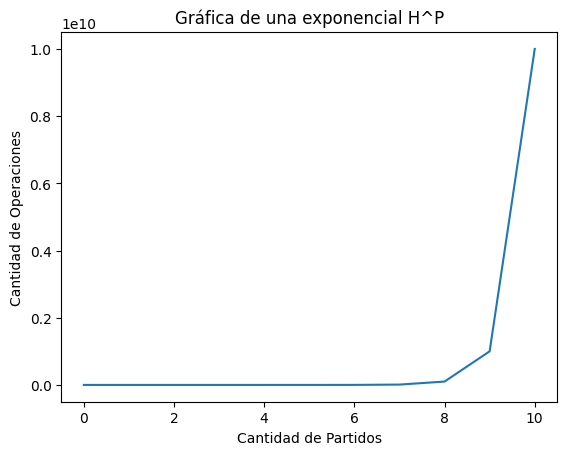

In [10]:
# Gráfica
H = 10 #cte
P = 10

import matplotlib.pyplot as plt
import numpy as np

# Datos para el eje y
y = np.array([H**P for P in range(P+1)])
# Datos para el eje x
x = np.array([P for P in range(P+1)])

# Crear la gráfica
plt.plot(x, y)

# Añadir etiquetas a los ejes
plt.xlabel("Cantidad de Partidos")
plt.ylabel("Cantidad de Operaciones")

# Añadir un título
plt.title("Gráfica de una exponencial H^P")

# Mostrar la gráfica
plt.show()

**(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta**

**(*)Calcula la complejidad del algoritmo**

Voy a abordar estas dos preguntas conjuntas ya que se presentan tres casos. Aquí le presento los diferentes algoritmos que he ido realizando hasta llegar a la solución final del problema:

- **Algoritmo (heurístico) de Poda:**
    - Breve descripción: Hacemos una heurística que consiste en que soluciones con horarios repetidos no serán soluciones óptimas y podamos dichas combinaciones.

    - Análisis: **Reduce la complejidad del algoritmo de O(2^n) a O(n) (lineal) si suponemos H (cantidad de horarios diferentes como constante) y además reduce la combinatoria de entrada a analizar a H! en vez de H^P**. Aunque para este problema es viable hacer una poda únicamente (y se obtiene la misma solución que por fuerza bruta en un tiempo infinitamente menor), el **algoritmo de poda no escala del todo bien si aumentásemos H o P a valores mucho más altos**.

- **Algoritmo genético:**
    - Breve descripción: Generamos una población inicial, para generar la siguiente población nos aseguramos que en la nueva población estén soluciones elitistas para no perder nuestras mejores soluciones encontradas en base a la función de fitness (audiencia), y además para tener mayor variedad hacemos una selección de torneo que generará padres que serán cruzados para obtener hijos que posteriormente se le mutarán genes para dar una mayor variedad y por último los hijos serán reparados si tras todo ello no cumplen con nuestras restricciones principales. Por último obtenemos la mejor solución de la generación producida.

    - Análisis: **Reduce la complejidad del algoritmo por fuerza bruta O(2^n) a O(n) lineal considerando H (horarios diferentes, N1 (población inicial) y N2 (población sucesora) como constantes**: Es un algoritmo que escala muy bien y nos da buenos resultados, quizás como mejora cuando el número de H y P sea muy elevado la solución aproximada no sea tan 'buena'. En ese caso se puede optar por la opción de aumentar N1 y N2 (tamaños de la población original y sucesora) u opción de hacer un bucle que genere más poblaciones siguientes lo cual elevaría la Big-O de O(n) a O(n^2) por este bucle per se. Igualmente para el problema actual es capaz de dar soluciones aproximadas con < 2% de diferencia respecto al resultado de fuerza bruta.

- **Algoritmo genético con Poda:**

    - Breve descripción: Conceptualmente es igual que el algoritmo genético normal pero ya asegurandose que los individuos de la población inicial no contengan horarios repetidos.

    - Análisis: **Reduce la complejidad del algoritmo por fuerza bruta O(2^n) a O(n^2) cuadrático (considerando H (horarios diferentes, N1 (población inicial) y N2 (población sucesora) como constantes) a consta de dar una solución aproximada, es el que mejores resultados obtiene en un espacio de tiempo inferior a 10 segundos**. Gracias a la poda (heurística) permite reducir la cantidad de combinaciones de entrada, lo que hace que la población incial generada para el algoritmo génetico se supone que sea de mayor calidad, traduciéndose así en un mejor resultado final, prácticamente siempre obtenemos el máximo de la función objetivo comparando con el resultado por fuerza bruta, pero no deja de ser un método aproximado y el hecho de incluir la poda hace que pase de O(n) a O(n^2) cuadrático.

 **Por último solo quedaría responder ¿cuándo debemos aplicar cada método?**:

- Caso particular (H=P) **este problema**:
  - **Algoritmo genético con Poda - O(n)** si queremos una buena aproximación de la solución en poco tiempo.
  - **Algoritmo heurístico de Poda - O(n^2)** si queremos una mejor aproximación de la solución en un tiempo algo mayor.
- Caso general (H!=P): **Algoritmo genético - O(n)** Si es necesaria las repeticiones de horario y esto la poda no lo permite.

### “Poda” mediante permutaciones o Pre-filtro (Heurística)
**- Poda (permutaciones sin repeticiones) se reduce a tiempo lineal en \(P\) y disminuye la cantidad de combinaciones a probar. Se obtiene la misma solución que por fuerza bruta pero sigue siendo algo heurístico.**

La complejidad es:

$$
T_{\text{poda}}(P) = O \left( P \times \frac{H!}{(H - P)!} \right )
$$

Si H es constante, entonces H!/(H - P)! es a lo sumo \( H! \), que es constante. Por tanto:

$$
T_{\text{poda}}(P) = O \bigl( P \times H! \bigr ) = O(P)
$$

- Crece **linealmente** en \( P \).

Como es inabordable tener lista con todas las combinaciones posibles, en fuerza bruta utilizaba un generador y calculaba por combinación generada. Si realizo una poda puedo evitar tener que resolver el problema para las ramas podadas. Tras haber lidiado muchas horas con el problema presente me di cuenta de lo siguiente:


**El árbol de expansión se compondría de todo el espacio de soluciones [_,_,_,_,_,_,_,_,_,_,_].**

1.   Digamos que un Padre con sus cotas superior e inferior de audiencia podrían ser Padre = [0,_,_,_,_,_,_,_,_,_,9]:


    1.   Max_audiencia_posible = Audiencia [P1[0]+P10[9]] + Audiencia_Base [P2:P8] # la conseguida hasta ahora más la maxima audiencia sin mermas.
    2.   Min_audiencia_posible = Audiencia [P1[0]+P10[9]] # la ya conseguida hasta ahora.





2.   Digamos que los Hijos de este Padre con sus cotas superior e inferior de audiencia podrían ser:


    1.   Hijos = [0,a,_,_,_,_,_,_,_,_,9] con a = {0 to 9} e ir guardando Max y Min de audiencia posibles tal como le explico arriba.
    2.   Hijos_2 = [0,a,b,_,_,_,_,_,_,_,9] con a, b {0 to 9}
    3.   Hijos_3 = [0,a,b,c,_,_,_,_,_,_,9] con a, b, c {0 to 9}
    4.   Hijos_4 = [0,a,b,c,d,_,_,_,_,_,9] con a, b, c, d {0 to 9}




3.   *1ª Poda*


  *   **Heurística:** Dentro de los hijos **puedo podar aquellas ramas que impliquen que cualquiera de sus hijos utilice un horario repetido en el de sus padres**, pues por coincidencia el mínimo puede ser menor que el de sus padres y posiblemente es menor que cualquiera de sus hermanos que posean una inclusión de horario diferente a los que les preceden en sus padres.
  La coincidencia hace que la cota superior de audiencia se vea a mucho más mermada, y hermanos que no incluyan repetición van a tener una mejor solución final con lo cual es imposible que si la combinación introduce elementos repetidos sean un óptimo y deben de ser podados.

  - **Heurística: Se cree que existen otros caminos mejores que los obtenidos por repetición:**

  


  - Supongamos A_1 y A_2 audiencias de partidos 1 y 2, P_i ponderación del partido i para ese horario (común) y C_i el factor de correción por repetición (común). La pregunta es **¿existe una P_j \ producida una correción C_i esa P_j encuentre una audiencia mayor?**

  Supongamos un ajuste de audiencias:

$$
A_1P_iC_i + A_2P_iC_i < A_1P_i+A_2P_j
$$

$$
(\text{¿E un j \ j =! i & siempre se cumpla?})
$$

  - Desarrollemos la expresión:
  $$
\frac{A_1P_iC_i - A_1P_i + A_2P_iC_i}{A_2} < P_j
$$  

  $$
\frac{A_1P_i(C_i-1) + A_2P_iC_i}{A_2} < P_j
$$

$$
\text{Llamemos } A_1' \text{ a la expresión: } A_1(1 - C_i) \implies A_1'< A_1
$$

$$
\frac{A_2P_iC_i-A_1'P_i}{A_2} < P_j
$$

$$
\frac{(A_2C_i-A_1')P_i}{A_2} < P_j
$$

$$
\text{Como } A_2C_i-A_1' << A_2 \text{ ya que } C_i (0,1)
$$

$$
\text{Llamemos } P_i' \text{ a la expresión: } \frac{(A_2C_i-A_1')P_i}{A_2} \implies P_i'<< P_i
$$

$$
\text{Por tanto: ¿E P_j tal que: } P_i' < P_j? \text{ Esto es cierto siempre que ocurra que  }  P_i \le P_j, i\ne j
$$

- **Y esto es cierto en este problema concreto para cualquier P_i, ya que dado una ponderación, existe otra ponderación en la tabla de ponderaciones del problema actual que como mínimo es igual o superior a ella misma y no es ella misma. Por tanto se deduce que dada una repetición en la combinación existe un hijo del mismo padre que no implica repetición con una ponderación por partido mejor o igual que hace que el óptimo se vea encontrado en la rama del hijo que no incluye repeticiones de horario entre sus partidos.**



  - Por tanto, ¿cómo se implementa esta 'Poda'? Aunque no es una Poda tradicional, la propia eliminación de combinaciones que nunca van a ser fructiferas es una 'poda' o pre-filtro que hace que nuestro algoritmo reduzca la cantidad de combinaciones a calcular, que se representan en un inicio como H^P y se reduce drásticamente a H!, **considerando H constante mejora de forma sustancial la complejidad del algoritmo por fuerza bruta, pues para este problema concretamente pasamos de tener 4mil cien millones de combinaciones a menos de 4 millones de combinaciones a analizar.**





4.   *2ª Poda (más dificil de implementar) e innecesaria*

*   Por otra parte se podría hacer una comparación entre diferentes ramas, con criterio de poda: **en el momento en el que el mínimo de una rama sobrepasa al máximo de otra, esta última rama debe ser podada, pues el máximo valor posible va a ser encontrado en otra rama.**


    4.1.   Ejemplo:


    1.   [0,1,2,3,4,5,_,_,_,_,9] Max(6 + 3,5)  Min(6) -> (9.5 , 6)
    2.   [1,2,3,4,5,0,6,_,_,_,9] Max(3,5 + 2,5)  Min(3,5) -> (6 , 3.5)
    3.   Podar([1,2,3,4,5,0,6,_,_,_,9]) y Back([0,1,2,3,4,5,_,_,_,_,9])

Aquí presento una **comparativa de la viabilidad de guardar datos en memoria** (con poda es más factible pero sigue siendo inviable).

In [ ]:
import sys
import math

H=10
P=10

t = tuple(range(10))
size = sys.getsizeof(t) + sum(sys.getsizeof(i) for i in t)

# Memoria Fuerza Bruta
print(f'{round(size*(H**P-2*(H-1)**P+(H-2)**P)/(2**30),2)} GB para almacenar las combinaciones Fuerza Bruta') # Fuerza bruta GB

# Memoria Poda
factorial = math.factorial(H)
print(f'{round(size*factorial/(2**30),2)} GB para almacenar las combinaciones con Poda') # Con poda almacenar combinaciones GB realmente esto si lo podría hacer pero ¿es bueno? e incluso pesará menos si hago la Poda 2 explicada abajo

1527.43 GB para almacenar las combinaciones Fuerza Bruta
1.35 GB para almacenar las combinaciones con Poda


Aquí presento la **diferencia de combinaciones entre el algoritmo por fuerza bruta y su poda (filtro) para un sub-problema** con P=3 y H=3

In [11]:
from itertools import permutations
from itertools import product

#FUERZA BRUTA
def combinaciones_validas(P, H): # generador para fuerza bruta, todas las combinaciones (4mil millones)
  for comb in product(range(H), repeat=P):
      if 0 in comb and (H - 1) in comb:
        print(comb)
        # yield comb

#PODA
def generar_tuplas_sin_repeticion(P, H):  # generador para poda, todas las combinaciones sin repeticón de elementos (4 millones)
  """Genera tuplas de longitud P con valores únicos entre 0 y H-1."""
  if P > H:
      return  # No es posible generar permutaciones de longitud P sin repetir si P > H
  for comb in permutations(range(H), P):
    if 0 in comb and (H - 1) in comb:
      print(comb)
      # yield comb

print('Combinaciones válidas con repetición FUERZA BRUTA:')
print(f'{combinaciones_validas(3, 3)}\n')
print('Combinaciones válidas sin repetición PODA:')
print(generar_tuplas_sin_repeticion(3, 3))

Combinaciones válidas con repetición FUERZA BRUTA:
(0, 0, 2)
(0, 1, 2)
(0, 2, 0)
(0, 2, 1)
(0, 2, 2)
(1, 0, 2)
(1, 2, 0)
(2, 0, 0)
(2, 0, 1)
(2, 0, 2)
(2, 1, 0)
(2, 2, 0)
None

Combinaciones válidas sin repetición PODA:
(0, 1, 2)
(0, 2, 1)
(1, 0, 2)
(1, 2, 0)
(2, 0, 1)
(2, 1, 0)
None


Algoritmo de Poda

In [ ]:
def problema_poda():
  import numpy as np
  import pandas as pd
  from itertools import product
  import time
  from collections import Counter
  import math


  # Condiciones iniciales para un problema fijo (P = PARTIDOS, H = HORARIOS)
  #############################################
  #        PROBLEMA P = 10 H = 10             #
  #############################################

  lista_partidos = [
    'Celta - Real Madrid',
    'Valencia - R.Sociedad',
    'Mallorca - Eibar',
    'Athletic - Barcelona',
    'Leganés - Osasuna',
    'Villareal - Granada',
    'Alavés - Levante',
    'Espayol - Sevilla',
    'Betis - Valladolid',
    'Atlético - Getafe',
    ]

  lista_categorias = ['B-A', 'B-A', 'C-C', 'B-A', 'C-C', 'B-C', 'B-B', 'B-B', 'B-C', 'B-B']

  lista_bases = [1.3, 1.3, 0.47, 1.3, 0.47, 0.75, 0.9, 0.9, 0.75, 0.9]

  Ponderacion = {'V20': 0.4, 'S12' : 0.55, 'S16' : 0.7, 'S18' : 0.8,
                  'S20' : 1, 'D12' : 0.45, 'D16' : 0.75, 'D18' : 0.85,
                  'D20' : 1, 'L20' : 0.4}

  ##############################################


  # Función que devuelve una lista con las diferentes correciones en base a la coincidencia
  def Correcion_por_coincidencia(lista_horario_partido):
      #Coincidencias = {'-%' : [0, 0.25, 0.45, 0.6, 0.7, 0.75, 0.78, 0.8, 0.8]} cogemos directamente la lista para no llamar al diccionario
      correcciones = [0, 0.25, 0.45, 0.6, 0.7, 0.75, 0.78, 0.8, 0.8]
      contador = Counter(lista_horario_partido)

      # Aplicar la corrección correspondiente a cada valor
      lista_correciones = [correcciones[min(contador[hora] - 1, len(correcciones) - 1)] for hora in lista_horario_partido]

      return np.array(lista_correciones)

  # Función que genera dataframe
  def generar_dataframe(lista_partidos: list, lista_categorias: list, lista_horario_partido:list, lista_bases: list, lista_ponderaciones:list, lista_base_ponderacion:list, lista_correciones_corregida:list ):

    dict_jornada = {
        'Partido' : lista_partidos,
        'Categorías' : lista_categorias,
        'Horario' : lista_horario_partido,
        'Base(Mill.)' : lista_bases,
        'Ponderación' : lista_ponderaciones,
        'Base*Ponderación' : lista_base_ponderacion,
        'Correción Coincidencia' : lista_correciones_corregida,
    }

    df_jornada = pd.DataFrame(dict_jornada)
    return df_jornada

#--------------------------PODA--------------------------------------#
  # Función que genera combinación sin repeticiones con restrincciones (10! combinaciones)
  def generar_tuplas_sin_repeticion(P, H):
      """Genera tuplas de longitud P con valores únicos entre 0 y H-1."""
      if P > H:
          return  # No es posible generar permutaciones de longitud P sin repetir si P > H
      for comb in permutations(range(H), P):
        if 0 in comb and (H - 1) in comb:
          yield comb
#--------------------------------------------------------------------#

  # Resolución del problema fuerza bruta podado

  # Declaración de Variables
  Total_max = 0 # Valor incial de Audiencia
  horario_max_audiencia = [] # Lista de horarios que generan la máx Audiencia

  listado_horarios = list(Ponderacion.keys()) # Definimos los horarios [V20, S12, S16...]

  # Combinatoria
  P = len(lista_partidos) # Cantidad de Partidos
  H = len(listado_horarios) # Cantidad de Horarios
  combinaciones_totales = math.factorial(H) # Combinaciones posibles

  # Generador de combinaciones sin repetición teniendo en cuentra restrincciones gen ira siendo cada una de las 4 M de combinaciones
  gen = generar_tuplas_sin_repeticion(H, P)

  start_time = time.time()  # Inicia temporizador para estimar tiempos de ejecución

  # Cálculo de la audiencia para cada combinación posible (FUERZA BRUTA CON PODA)
  for i, fila in enumerate(gen):
    fila_array = np.array(fila)
    lista_horario_partido = np.array(listado_horarios)[fila_array] # Array con los horarios a analizar para la jornada
    lista_ponderaciones = np.array([Ponderacion[h] for h in lista_horario_partido]) # Array con las ponderaciones para cada partido según su horario
    lista_base_ponderacion = np.array(lista_bases)*lista_ponderaciones # Array con la audiencia base modificada por el efecto de la ponderación del horario
    lista_correciones = Correcion_por_coincidencia(lista_horario_partido) # Array con las correciones por coincidencia a aplicar a lista_base_ponderacion (Reparto de audiencia por solapamiento)
    lista_correciones_corregida = lista_base_ponderacion*(1-lista_correciones) # Array con las audiencias finales por partido
    Total = np.sum(lista_correciones_corregida) # Valor de Audiencia Total para la combinación 'gen' (generada) [0,0,0,0,0,0,0,0,0,0] hasta [9,9,9,9,9,9,9,9,9,9] 4 M de combinaciones

    # NUEVO MÁXIMO ENCONTRADO
    if Total > Total_max:
      Total_max = Total # Guardamos el valor de Audiencia máxima encontrada
      horario_max_audiencia = [lista_horario_partido.tolist()] # Guardamos la combinación de horarios de Audiencia máxima encontrada
      print(f'\nCombinación número: {i}, Máxima Audiencia encontrada: {Total_max:.2f}')
      end_time = time.time()  # Finaliza temporizador

      # Mostramos el Tiempo transcurrido
      tiempo_transcurrido = int(end_time - start_time)
      horas_transcurridas = int(tiempo_transcurrido//3600)
      minutos_transcurridos = int((tiempo_transcurrido %3600)//60)
      segundos_transcurridos = int(tiempo_transcurrido-horas_transcurridas*3600)%60
      print(f"Tiempo total de ejecución: {horas_transcurridas} horas, {minutos_transcurridos} minutos y {segundos_transcurridos} segundos")

      # Mostramos el Tiempo de ejecución estimado (en base a la cantidad de instrucciones por segundo que se están ejecutando y la cantidad de combinaciones totales que hay que probar)
      if i>1:
        tiempo_estimado_total = (combinaciones_totales*(end_time - start_time)/i)
        horas = int(tiempo_estimado_total//3600)
        minutos = int((tiempo_estimado_total %3600)//60)
        segundos = int(tiempo_estimado_total-horas*3600)%60
        print(f"Tiempo total estimado: {horas} horas, {minutos} minutos y {segundos} segundos")

    # REPETICIÓN DE MÁXIMO ENCONTRADO
    elif Total == Total_max:
      horario_max_audiencia.append(lista_horario_partido.tolist())

  # ¿1 Solución o varias?
  if len(horario_max_audiencia) == 1:
    print(f'\nSolución: El horario con máxima audiencia es: {horario_max_audiencia} y obtiene una audiencia de {Total_max} \n')
  elif len(horario_max_audiencia) > 1:
    print(f'\nSolución: Los horarios con máxima audiencia son: {len(horario_max_audiencia)} y se obtiene una audiencia de {Total_max} en cualquiera de estas combinaciones \n')

  # Mostramos el DataFrame para los horarios que producen una máxima audiencia en una jornada, no lo hacemos antes porque 'horario_max_audiencia' se va reescribiendo y consume memoria e instrucciones extra y el momento es ahora.
  # Cálculo de la audiencia para cada MEJOR combinación posible que proporcionan la solución óptima del problema.
  for lista_horario_partido in horario_max_audiencia:
    lista_ponderaciones = np.array([Ponderacion[h] for h in lista_horario_partido])
    lista_base_ponderacion = np.array(lista_bases)*lista_ponderaciones
    lista_correciones = Correcion_por_coincidencia(lista_horario_partido)
    lista_correciones_corregida = lista_base_ponderacion*(1-lista_correciones)
    # Construimos el Dataframe
    df_jornada_max_audiencia = generar_dataframe(lista_partidos, lista_categorias, lista_horario_partido, lista_bases, lista_ponderaciones, lista_base_ponderacion, lista_correciones_corregida)
    display(df_jornada_max_audiencia)
    Total = np.sum(lista_correciones_corregida)
    print(f'La audiencia total esperada es: {Total} M. \n')

In [ ]:
problema_poda()


Combinación número: 0, Máxima Audiencia encontrada: 5.96
Tiempo total de ejecución: 0 horas, 0 minutos y 0 segundos

Combinación número: 1, Máxima Audiencia encontrada: 6.05
Tiempo total de ejecución: 0 horas, 0 minutos y 0 segundos

Combinación número: 104, Máxima Audiencia encontrada: 6.05
Tiempo total de ejecución: 0 horas, 0 minutos y 0 segundos
Tiempo total estimado: 0 horas, 2 minutos y 29 segundos

Combinación número: 120, Máxima Audiencia encontrada: 6.12
Tiempo total de ejecución: 0 horas, 0 minutos y 0 segundos
Tiempo total estimado: 0 horas, 2 minutos y 27 segundos

Combinación número: 121, Máxima Audiencia encontrada: 6.21
Tiempo total de ejecución: 0 horas, 0 minutos y 0 segundos
Tiempo total estimado: 0 horas, 2 minutos y 27 segundos

Combinación número: 145, Máxima Audiencia encontrada: 6.24
Tiempo total de ejecución: 0 horas, 0 minutos y 0 segundos
Tiempo total estimado: 0 horas, 2 minutos y 36 segundos

Combinación número: 626, Máxima Audiencia encontrada: 6.26
Tiempo

,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,S20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,S20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,S20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,S20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,S20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,S20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,S20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,S20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,S20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,S20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,S20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,S20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,S20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,S20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,S20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,S20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,S20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,S20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,S20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,S20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,S20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,S20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,S20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,S20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,D20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,D20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,D20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,D20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,D20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,D20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,D20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,D20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,D20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,D20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,D20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,D20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,D16,0.90,0.75,0.6750,0.6750


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S18,0.90,0.80,0.7200,0.7200
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S16,0.90,0.70,0.6300,0.6300
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


La audiencia total esperada es: 6.856000000000001 M. 



,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


La audiencia total esperada es: 6.856000000000001 M. 



### Algoritmo Genético
**Reduce la complejidad a O(n) sacrificando una solución exacta por una aproximada < 2% de diferencia respecto a la exacta**

Resumen del cálculo de la Complejidad:

- Población inicial	O(N1 · P)	Genera N1 individuos de tamaño P
- Selección por torneo	O(1)	k constante, accesos directos a fitness precomputado
- Cálculo de élites	O(N1 · P)	Fitness completo + selección O(N1 log(e))
- Generación de hijos	O(N2 · P)	Cruce/mutación/reparación por cada hijo
- Búsqueda de solución óptima	O(N2 · P)	Fitness para toda la nueva generación
- TOTAL (H constante)	O((N1 + N2) · P)	Término dominante: operaciones sobre P

**Por tanto, la complejidad total considerando N1 y N2 como constantes sería O(P) - complejidad lineal**

In [ ]:
# LIBRERIAS
import random
import numpy as np
import pandas as pd
from collections import Counter
import heapq

# Función de generación de individuos que conformarán la población inicial
def generar_individuo(P: int, H: int) -> list[int]:
    """
    Genera un cromosoma de longitud P con valores en [0,H),
    re-muestreando hasta que cumpla la restricción de
    contener 0 y H-1.
    """
    while True:
        ind = [random.randrange(H) for _ in range(P)]
        if es_valido(ind, H):
            return ind

# Función que determina si la creación de un individuo es válida (posee las restrinciones)
def es_valido(individuo: list[int], H: int) -> bool:
    """
    Comprueba que el individuo contenga al menos
    un horario 0 y un horario H-1.
    """
    s = set(individuo)
    return 0 in s and (H-1) in s



# Función que devuelve una lista con las diferentes correciones en base a la coincidencia
def Correcion_por_coincidencia(lista_horario_partido):
    correcciones = [0, 0.25, 0.45, 0.6, 0.7, 0.75, 0.78, 0.8, 0.8]
    contador = Counter(lista_horario_partido)

    # Aplicar la corrección correspondiente a cada valor
    lista_correciones = [correcciones[min(contador[hora] - 1, len(correcciones) - 1)] for hora in lista_horario_partido]

    return np.array(lista_correciones)

# Función de fitness del algoritmo genético (función objetivo)
def fitness_funtion(individuo: list[int], lista_bases: list[float], Ponderacion: dict[str,float], listado_horarios: list[str]):

    fila_array = np.array(individuo)
    lista_horario_partido = np.array(listado_horarios)[fila_array] # Array con los horarios a analizar para la jornada
    lista_ponderaciones = np.array([Ponderacion[h] for h in lista_horario_partido]) # Array con las ponderaciones para cada partido según su horario
    lista_base_ponderacion = np.array(lista_bases)*lista_ponderaciones # Array con la audiencia base modificada por el efecto de la ponderación del horario
    lista_correciones = Correcion_por_coincidencia(lista_horario_partido) # Array con las correciones por coincidencia a aplicar a lista_base_ponderacion (Reparto de audiencia por solapamiento)
    lista_correciones_corregida = lista_base_ponderacion*(1-lista_correciones) # Array con las audiencias finales por partido
    Total = np.sum(lista_correciones_corregida) # Valor de Audiencia Total para la combinación 'gen' (generada) [0,0,0,0,0,0,0,0,0,0] hasta [9,9,9,9,9,9,9,9,9,9] 4.100 M de combinaciones
    return Total  # Valor de Audiencia Total para el individuo

# Generar la población inicial
def generar_poblacion(N: int, P: int, H: int) -> list[list[int]]:
    poblacion = []
    for _ in range(N):
      poblacion.append(generar_individuo(P, H))
    return poblacion

# Seleccionar los mejores candidatos de un torneo (muestra de la población) en base a la función fitness (Audiencia máxima) (intensifica la exploración)
def seleccion_torneo(poblacion: list[list[int]], fitness_values: list[float], k: int) -> list[int]:
    """
    Selección por torneo usando fitness precomputados.

    - Elige aleatoriamente k individuos (índices).
    - Devuelve el individuo con mayor fitness.
    """
    # Elegir k índices al azar
    indices_torneo = random.sample(range(len(poblacion)), k)

    # Extraer fitness de esos individuos
    fitness_torneo = [fitness_values[i] for i in indices_torneo]

    # Índice (dentro de indices_torneo) del mejor
    ganador_local_idx = fitness_torneo.index(max(fitness_torneo))

    # Índice global en la población
    ganador_idx = indices_torneo[ganador_local_idx]

    return poblacion[ganador_idx]

# Función de cruce de padres para generar hijos
def crossover_un_punto(padre: list[int], madre: list[int]) -> tuple[list[int], list[int]]:
    """
    Toma dos padres (listas de igual longitud) y devuelve dos hijos
    intercambiando las colas tras un punto aleatorio.
    """
    P = len(padre)
    # Punto de corte entre 1 y P-1
    punto = random.randrange(1, P)
    # Hijos = [genes padre hasta punto] + [genes madre desde punto]
    hijo1 = padre[:punto] + madre[punto:]
    hijo2 = madre[:punto] + padre[punto:]
    return hijo1, hijo2

# Función que introduce una mutación en la cadena del hijo (diversifica la exploración)
def mutacion_gen(individuo: list[int], H: int, tasa: float = 0.1) -> list[int]:
    """
    Para cada gen, con probabilidad `tasa` lo reemplaza por un
    horario aleatorio distinto en [0, H).
    """
    hijo = individuo.copy()
    for i in range(len(hijo)):
        if random.random() < tasa:
            nuevo = random.randrange(H)
            # Asegura que cambie realmente
            while nuevo == hijo[i]:
                nuevo = random.randrange(H)
            hijo[i] = nuevo
    return hijo

# Función que repara un hijo para que cumpla con las restricciones de horario ya sea que no cumpla por el cruce o por la mutación.
def reparar(hijo: list[int], H: int) -> list[int]:
    """
    Repara el individuo para garantizar que contenga al menos:
    - un 0
    - un H-1

    Si alguno falta, reemplaza posiciones aleatorias para introducirlos.
    """
    hijo = hijo.copy()  # evitar modificar el original

    # Verificar qué falta
    tiene_cero = 0 in hijo
    tiene_hmax = (H - 1) in hijo

    if tiene_cero and tiene_hmax:
        return hijo

    # Indices posibles para reemplazo
    indices = list(range(len(hijo)))

    # Reemplazar para incluir el 0 si falta
    if not tiene_cero:
        pos = random.choice(indices)
        hijo[pos] = 0
        indices.remove(pos)

    # Reemplazar para incluir el H-1 si falta
    if not tiene_hmax:
        if indices:
            pos = random.choice(indices)
        else:
            # por si ya usamos el único índice disponible
            pos = random.randint(0, len(hijo)-1)
        hijo[pos] = H - 1

    return hijo

# Definir la siguiente generación de la población.
# IMPORTANTÍSIMO: Cuanto mejor sea la calidad del muestreo de la población mejores posibilidades tendrán los hijos de esta.
def siguiente_generacion(poblacion: list[list[int]], H: int, lista_bases, Ponderacion, listado_horarios, k_torneo: int = 3, e: int = 2, N: int = 50) -> list[list[int]]:
    """
    Devuelve la próxima generación aplicando:
      1) Elitismo: copia los 'e' mejores individuos intactos.
      2) Torneos para llenar el resto hasta N.
    Parámetros:
      - poblacion: población actual
      - k_torneo: tamaño del torneo
      - e: número de élites a conservar
      - N: tamaño total de la nueva población
    """
    # 1) Calcular fitness de toda la población
    fitness_values = [fitness_funtion(ind, lista_bases, Ponderacion, listado_horarios) for ind in poblacion]

    # 2) Elitismo: quedarnos con los e mejores
    #    heapq.nlargest devuelve tuplas (fitness, individuo)
    elites = heapq.nlargest(e, zip(fitness_values, poblacion), key=lambda x: x[0])
    nueva_pob = [ind for (_, ind) in elites]

    # 3) Rellenar con selección por torneo
    while len(nueva_pob) < N:
      padre = seleccion_torneo(poblacion, fitness_values, k=k_torneo)
      madre = seleccion_torneo(poblacion, fitness_values, k=k_torneo)

      h1, h2 = crossover_un_punto(padre, madre)

      # Mutar
      h1 = mutacion_gen(h1, H, tasa=0.05)
      h2 = mutacion_gen(h2, H, tasa=0.05)

      # Validar o reparar cada hijo
      if not es_valido(h1, H): h1 = reparar(h1, H)
      if not es_valido(h2, H): h2 = reparar(h2, H)

      nueva_pob.extend([h1, h2])

    # 4) Si hemos excedido N (por meter 2 hijos al final), lo truncamos
    return nueva_pob[:N]

# Tomar el máximo de la generación
def get_max_poblacion(next_gen):
    Total_max = 0
    soluciones = []              # lista de listas: [ [individuo1], [individuo2], ... ]

    for individuo in next_gen:
        total = fitness_funtion(individuo, lista_bases, Ponderacion, listado_horarios)
        if total > Total_max:
            Total_max = total
            soluciones = [individuo.copy()]   # ¡envolvemos en lista!
        elif total == Total_max:
            soluciones.append(individuo.copy())

    return Total_max, soluciones

# Función que genera dataframe
def generar_dataframe(lista_partidos: list, lista_categorias: list, lista_horario_partido:list, lista_bases: list, lista_ponderaciones:list, lista_base_ponderacion:list, lista_correciones_corregida:list ):

  dict_jornada = {
      'Partido' : lista_partidos,
      'Categorías' : lista_categorias,
      'Horario' : lista_horario_partido,
      'Base(Mill.)' : lista_bases,
      'Ponderación' : lista_ponderaciones,
      'Base*Ponderación' : lista_base_ponderacion,
      'Correción Coincidencia' : lista_correciones_corregida,
  }

  df_jornada = pd.DataFrame(dict_jornada)
  return df_jornada

# Condiciones iniciales para un problema fijo (P = PARTIDOS, H = HORARIOS)

  ##############################################
  #############################################
    # PROBLEMA P = 10 H = 10
  #############################################


lista_partidos = [
  'Celta - Real Madrid',
  'Valencia - R.Sociedad',
  'Mallorca - Eibar',
  'Athletic - Barcelona',
  'Leganés - Osasuna',
  'Villareal - Granada',
  'Alavés - Levante',
  'Espayol - Sevilla',
  'Betis - Valladolid',
  'Atlético - Getafe',
  ]

lista_categorias = ['B-A', 'B-A', 'C-C', 'B-A', 'C-C', 'B-C', 'B-B', 'B-B', 'B-C', 'B-B']

lista_bases = [1.3, 1.3, 0.47, 1.3, 0.47, 0.75, 0.9, 0.9, 0.75, 0.9]


Ponderacion = {'V20': 0.4, 'S12' : 0.55, 'S16' : 0.7, 'S18' : 0.8,
                'S20' : 1, 'D12' : 0.45, 'D16' : 0.75, 'D18' : 0.85,
                'D20' : 1, 'L20' : 0.4}

listado_horarios = list(Ponderacion.keys())
  ##############################################

####################################################
# Resolución del problema por ALGORITMOS GENÉTICOS #
####################################################

# Variables iniciales
N1 = 100000 # cantidad de individuos a generar para la población inicial
N2 = 50000 # cantidad de individuos que compondrán la siguiente generación
P = len(lista_partidos) # Cantidad de Partidos
H = len(listado_horarios) # Cantidad de Horarios
k_torneo = 3
elitismo = 2

poblacion_inicial = generar_poblacion(N1, P, H) # Generamos la población inicial

next_gen = siguiente_generacion(poblacion_inicial, H, lista_bases, Ponderacion, listado_horarios, k_torneo, elitismo, N2) # Generamos la siguiente generación

total_max, soluciones = get_max_poblacion(next_gen) # Obtenemos el individuo de la generación que nos da el máximo de audiencia encontrado y las soluciones de horarios que derivan en él

print(f'\nAudiencia máxima encontrada: {total_max:.2f} M.')
print(f'Número de empates: {len(soluciones)}\n')

# Mostramos resultados
for idx, horario_indice in enumerate(soluciones, start=1):
    # horario_indice ahora SÍ es una lista de ints
    horario_etiquetas = [listado_horarios[i] for i in horario_indice]

    print(f'── Solución #{idx}: horarios = {horario_etiquetas}')

    # cálculo de ponderaciones y correcciones
    lista_ponderaciones = np.array([Ponderacion[h] for h in horario_etiquetas])
    lista_base_ponderacion = np.array(lista_bases) * lista_ponderaciones
    lista_correciones = Correcion_por_coincidencia(horario_indice)
    lista_correciones_corregida = lista_base_ponderacion * (1 - lista_correciones)

    df = generar_dataframe(
        lista_partidos,
        lista_categorias,
        horario_etiquetas,
        lista_bases,
        lista_ponderaciones,
        lista_base_ponderacion,
        lista_correciones_corregida
    )
    display(df)

    Total = np.sum(lista_correciones_corregida)
    print(f'  → Audiencia total esperada (solución #{idx}): {Total:.2f} M.\n')


Audiencia máxima encontrada: 6.75 M.
Número de empates: 1

── Solución #1: horarios = ['D20', 'D18', 'L20', 'S20', 'V20', 'S16', 'D16', 'S12', 'D16', 'S18']


,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D20,1.30,1.00,1.3000,1.300000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.105000
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.188000
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.300000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.188000
5,Villareal - Granada,B-C,S16,0.75,0.70,0.5250,0.525000
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.506250
7,Espayol - Sevilla,B-B,S12,0.90,0.55,0.4950,0.495000
8,Betis - Valladolid,B-C,D16,0.75,0.75,0.5625,0.421875
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.720000


  → Audiencia total esperada (solución #1): 6.75 M.



### ALGORITMO GENÉTICO CON PODA
**Implementa las mejoras de los dos métodos anteriores, el algoritmo genético reduce la complejidad Big-O y la poda asegura que el estudio de una combinación degenerará en una solución suficientemente buena de partida (aumentando la calidad de las soluciones iniciales a consta de convertir la complejidad en cuadrática O(P^2), por tanto, para la misma población inicial (N1) obtendremos mejores soluciones incluso si queremos que la siguiente población (N2) sea más reducida. La exactitud de este algoritmo la verdad me ha sorprendido porque el 100% de las veces que lo he ejecutado me ha dado al menos 1 solución con el valor del método exacto 6.86 M y esto se debe a la mejora de la poda que hace que el algoritmo 'sepa donde buscar inicialmente'.**

In [ ]:
# LIBRERIAS
import random
import numpy as np
import pandas as pd
from collections import Counter
import heapq

#--------------------------PODA--------------------------------------#

# Función de generación de individuos que conformarán la población inicial sin repeticiones de horarios
def generar_individuo(P: int, H: int) -> list[int]:
    """
    Genera un cromosoma de longitud P con valores en [0,H),
    re-muestreando hasta que cumpla la restricción de
    contener 0 y H-1.
    """
    horarios_disponibles = [_ for _ in range(H)]
    ind = []
    while True:
        valor = random.choice(horarios_disponibles)
        ind.append(valor)
        horarios_disponibles.remove(valor)

        if es_valido(ind, H):
            return ind

# Función que determina si la creación de un individuo es válida (posee las restrinciones y sin repeticiones (poda))
def es_valido(individuo: list[int], H: int) -> bool:
    """
    Comprueba que el individuo contenga al menos
    un horario 0 y un horario H-1.
    """
    s = set(individuo)
    return 0 in s and (H-1) in s and len(individuo) == H
#--------------------------------------------------------------------#


# Función que devuelve una lista con las diferentes correciones en base a la coincidencia
def Correcion_por_coincidencia(lista_horario_partido):
    correcciones = [0, 0.25, 0.45, 0.6, 0.7, 0.75, 0.78, 0.8, 0.8]
    contador = Counter(lista_horario_partido)

    # Aplicar la corrección correspondiente a cada valor
    lista_correciones = [correcciones[min(contador[hora] - 1, len(correcciones) - 1)] for hora in lista_horario_partido]

    return np.array(lista_correciones)

# Función de fitness del algoritmo genético (función objetivo)
def fitness_funtion(individuo: list[int], lista_bases: list[float], Ponderacion: dict[str,float], listado_horarios: list[str]):
    fila_array = np.array(individuo)
    lista_horario_partido = np.array(listado_horarios)[fila_array] # Array con los horarios a analizar para la jornada
    lista_ponderaciones = np.array([Ponderacion[h] for h in lista_horario_partido]) # Array con las ponderaciones para cada partido según su horario
    lista_base_ponderacion = np.array(lista_bases)*lista_ponderaciones # Array con la audiencia base modificada por el efecto de la ponderación del horario
    lista_correciones = Correcion_por_coincidencia(lista_horario_partido) # Array con las correciones por coincidencia a aplicar a lista_base_ponderacion (Reparto de audiencia por solapamiento)
    lista_correciones_corregida = lista_base_ponderacion*(1-lista_correciones) # Array con las audiencias finales por partido
    Total = np.sum(lista_correciones_corregida) # Valor de Audiencia Total para cada partido del individuo
    return Total  # Valor de Audiencia Total para el individuo

# Generar la población inicial
def generar_poblacion(N: int, P: int, H: int) -> list[list[int]]:
    poblacion = []
    for _ in range(N):
      poblacion.append(generar_individuo(P, H))
    return poblacion

# Seleccionar los mejores candidatos de un torneo (muestra de la población) en base a la función fitness (Audiencia máxima) (intensifica la exploración)
def seleccion_torneo(poblacion: list[list[int]], fitness_values: list[float], k: int) -> list[int]:
    """
    Selección por torneo usando fitness precomputados.

    - Elige aleatoriamente k individuos (índices).
    - Devuelve el individuo con mayor fitness.
    """
    # Elegir k índices al azar
    indices_torneo = random.sample(range(len(poblacion)), k)

    # Extraer fitness de esos individuos
    fitness_torneo = [fitness_values[i] for i in indices_torneo]

    # Índice (dentro de indices_torneo) del mejor
    ganador_local_idx = fitness_torneo.index(max(fitness_torneo))

    # Índice global en la población
    ganador_idx = indices_torneo[ganador_local_idx]

    return poblacion[ganador_idx]

# Función de cruce de padres para generar hijos
def crossover_un_punto(padre: list[int], madre: list[int]) -> tuple[list[int], list[int]]:
    """
    Toma dos padres (listas de igual longitud) y devuelve dos hijos
    intercambiando las colas tras un punto aleatorio.
    """
    P = len(padre)
    # Punto de corte entre 1 y P-1
    punto = random.randrange(1, P)
    # Hijos = [genes padre hasta punto] + [genes madre desde punto]
    hijo1 = padre[:punto] + madre[punto:]
    hijo2 = madre[:punto] + padre[punto:]
    return hijo1, hijo2

# Función que introduce una mutación en la cadena del hijo (diversifica la exploración)
def mutacion_gen(individuo: list[int], H: int, tasa: float = 0.1) -> list[int]:
    """
    Para cada gen, con probabilidad `tasa` lo reemplaza por un
    horario aleatorio distinto en [0, H).
    """
    hijo = individuo.copy()
    for i in range(len(hijo)):
        if random.random() < tasa:
            nuevo = random.randrange(H)
            # Asegura que cambie realmente
            while nuevo == hijo[i]:
                nuevo = random.randrange(H)
            hijo[i] = nuevo
    return hijo

# Función que repara un hijo para que cumpla con las restricciones de horario ya sea que no cumpla por el cruce o por la mutación.
def reparar(hijo: list[int], H: int) -> list[int]:
    """
    Repara el individuo para garantizar que contenga al menos:
    - un 0
    - un H-1

    Si alguno falta, reemplaza posiciones aleatorias para introducirlos.
    """
    hijo = hijo.copy()  # evitar modificar el original

    # Verificar qué falta
    tiene_cero = 0 in hijo
    tiene_hmax = (H - 1) in hijo

    if tiene_cero and tiene_hmax:
        return hijo

    # Indices posibles para reemplazo
    indices = list(range(len(hijo)))

    # Reemplazar para incluir el 0 si falta
    if not tiene_cero:
        pos = random.choice(indices)
        hijo[pos] = 0
        indices.remove(pos)

    # Reemplazar para incluir el H-1 si falta
    if not tiene_hmax:
        if indices:
            pos = random.choice(indices)
        else:
            # por si ya usamos el único índice disponible
            pos = random.randint(0, len(hijo)-1)
        hijo[pos] = H - 1

    return hijo

# Definir la siguiente generación de la población.
# IMPORTANTÍSIMO: Cuanto mejor sea la calidad del muestreo de la población mejores posibilidades tendrán los hijos de esta.
def siguiente_generacion(poblacion: list[list[int]], H: int, lista_bases, Ponderacion, listado_horarios, k_torneo: int = 3, e: int = 2, N: int = 50) -> list[list[int]]:
    """
    Devuelve la próxima generación aplicando:
      1) Elitismo: copia los 'e' mejores individuos intactos.
      2) Torneos para llenar el resto hasta N.
    Parámetros:
      - poblacion: población actual
      - k_torneo: tamaño del torneo
      - e: número de élites a conservar
      - N: tamaño total de la nueva población
    """
    # 1) Calcular fitness de toda la población
    fitness_values = [fitness_funtion(ind, lista_bases, Ponderacion, listado_horarios) for ind in poblacion]

    # 2) Elitismo: quedarnos con los e mejores
    #    heapq.nlargest devuelve tuplas (fitness, individuo)
    elites = heapq.nlargest(e, zip(fitness_values, poblacion), key=lambda x: x[0])
    nueva_pob = [ind for (_, ind) in elites]

    # 3) Rellenar con selección por torneo
    while len(nueva_pob) < N:
      padre = seleccion_torneo(poblacion, fitness_values, k=k_torneo)
      madre = seleccion_torneo(poblacion, fitness_values, k=k_torneo)

      h1, h2 = crossover_un_punto(padre, madre)

      # Mutar
      h1 = mutacion_gen(h1, H, tasa=0.05)
      h2 = mutacion_gen(h2, H, tasa=0.05)

      # Validar o reparar cada hijo
      if not es_valido(h1, H): h1 = reparar(h1, H)
      if not es_valido(h2, H): h2 = reparar(h2, H)

      nueva_pob.extend([h1, h2])

    # 4) Si hemos excedido N (por meter 2 hijos al final), lo truncamos
    return nueva_pob[:N]

# Tomar el máximo de la generación
def get_max_poblacion(next_gen):
    Total_max = 0
    soluciones = []              # lista de listas: [ [individuo1], [individuo2], ... ]

    for individuo in next_gen:
        total = fitness_funtion(individuo, lista_bases, Ponderacion, listado_horarios)
        if total > Total_max:
            Total_max = total
            soluciones = [individuo.copy()]   # ¡envolvemos en lista!
        elif total == Total_max:
            soluciones.append(individuo.copy())

    return Total_max, soluciones

# Función que genera dataframe
def generar_dataframe(lista_partidos: list, lista_categorias: list, lista_horario_partido:list, lista_bases: list, lista_ponderaciones:list, lista_base_ponderacion:list, lista_correciones_corregida:list ):

  dict_jornada = {
      'Partido' : lista_partidos,
      'Categorías' : lista_categorias,
      'Horario' : lista_horario_partido,
      'Base(Mill.)' : lista_bases,
      'Ponderación' : lista_ponderaciones,
      'Base*Ponderación' : lista_base_ponderacion,
      'Correción Coincidencia' : lista_correciones_corregida,
  }

  df_jornada = pd.DataFrame(dict_jornada)
  return df_jornada

# Condiciones iniciales para un problema fijo (P = PARTIDOS, H = HORARIOS)

  ##############################################
  #############################################
    # PROBLEMA P = 10 H = 10
  #############################################


lista_partidos = [
  'Celta - Real Madrid',
  'Valencia - R.Sociedad',
  'Mallorca - Eibar',
  'Athletic - Barcelona',
  'Leganés - Osasuna',
  'Villareal - Granada',
  'Alavés - Levante',
  'Espayol - Sevilla',
  'Betis - Valladolid',
  'Atlético - Getafe',
  ]

lista_categorias = ['B-A', 'B-A', 'C-C', 'B-A', 'C-C', 'B-C', 'B-B', 'B-B', 'B-C', 'B-B']

lista_bases = [1.3, 1.3, 0.47, 1.3, 0.47, 0.75, 0.9, 0.9, 0.75, 0.9]


Ponderacion = {'V20': 0.4, 'S12' : 0.55, 'S16' : 0.7, 'S18' : 0.8,
                'S20' : 1, 'D12' : 0.45, 'D16' : 0.75, 'D18' : 0.85,
                'D20' : 1, 'L20' : 0.4}

listado_horarios = list(Ponderacion.keys())
  ##############################################

####################################################
# Resolución del problema por ALGORITMOS GENÉTICOS #
####################################################

# Variables iniciales
N1 = 100000 # cantidad de individuos a generar para la población inicial
N2 = 5000 # cantidad de individuos que compondrán la siguiente generación
P = len(lista_partidos) # Cantidad de Partidos
H = len(listado_horarios) # Cantidad de Horarios
k_torneo = 3
elitismo = 2

poblacion_inicial = generar_poblacion(N1, P, H) # Generamos la población inicial

next_gen = siguiente_generacion(poblacion_inicial, H, lista_bases, Ponderacion, listado_horarios, k_torneo, elitismo, N2) # Generamos la siguiente generación

total_max, soluciones = get_max_poblacion(next_gen) # Obtenemos el individuo de la generación que nos da el máximo de audiencia encontrado y las soluciones de horarios que derivan en él

print(f'\nAudiencia máxima encontrada: {total_max:.2f} M.')
print(f'Número de empates: {len(soluciones)}\n')

# Mostramos resultados
for idx, horario_indice in enumerate(soluciones, start=1):
    # horario_indice ahora SÍ es una lista de ints
    horario_etiquetas = [listado_horarios[i] for i in horario_indice]

    print(f'── Solución #{idx}: horarios = {horario_etiquetas}')

    # cálculo de ponderaciones y correcciones
    lista_ponderaciones = np.array([Ponderacion[h] for h in horario_etiquetas])
    lista_base_ponderacion = np.array(lista_bases) * lista_ponderaciones
    lista_correciones = Correcion_por_coincidencia(horario_indice)
    lista_correciones_corregida = lista_base_ponderacion * (1 - lista_correciones)

    df = generar_dataframe(
        lista_partidos,
        lista_categorias,
        horario_etiquetas,
        lista_bases,
        lista_ponderaciones,
        lista_base_ponderacion,
        lista_correciones_corregida
    )
    display(df)

    Total = np.sum(lista_correciones_corregida)
    print(f'  → Audiencia total esperada (solución #{idx}): {Total:.2f} M.\n')


Audiencia máxima encontrada: 6.86 M.
Número de empates: 2

── Solución #1: horarios = ['D18', 'D20', 'L20', 'S20', 'V20', 'S12', 'D16', 'S18', 'D12', 'S16']


,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,D18,1.30,0.85,1.1050,1.1050
1,Valencia - R.Sociedad,B-A,D20,1.30,1.00,1.3000,1.3000
2,Mallorca - Eibar,C-C,L20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,S20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,V20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,D16,0.90,0.75,0.6750,0.6750
7,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.7200
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S16,0.90,0.70,0.6300,0.6300


  → Audiencia total esperada (solución #1): 6.86 M.

── Solución #2: horarios = ['S20', 'D18', 'V20', 'D20', 'L20', 'S12', 'S16', 'D16', 'D12', 'S18']


,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Celta - Real Madrid,B-A,S20,1.30,1.00,1.3000,1.3000
1,Valencia - R.Sociedad,B-A,D18,1.30,0.85,1.1050,1.1050
2,Mallorca - Eibar,C-C,V20,0.47,0.40,0.1880,0.1880
3,Athletic - Barcelona,B-A,D20,1.30,1.00,1.3000,1.3000
4,Leganés - Osasuna,C-C,L20,0.47,0.40,0.1880,0.1880
5,Villareal - Granada,B-C,S12,0.75,0.55,0.4125,0.4125
6,Alavés - Levante,B-B,S16,0.90,0.70,0.6300,0.6300
7,Espayol - Sevilla,B-B,D16,0.90,0.75,0.6750,0.6750
8,Betis - Valladolid,B-C,D12,0.75,0.45,0.3375,0.3375
9,Atlético - Getafe,B-B,S18,0.90,0.80,0.7200,0.7200


  → Audiencia total esperada (solución #2): 6.86 M.



### Preguntas

**Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios**


El juego de datos de entrada aleatorios que propongo es organizar los horarios de partidos de La Liga para una Jornada aleatoria de tal forma que maximice la audiencia de dicha Jornada.

Mi aleatoriedad vendrá dada por los enfrentamientos que se produzcan en cada partido de esa jornada, clasificaremos los partidos según los valores de las tablas categorías, ponderaciones y la correción por coincidencia asignandole la que corresponda para cada partido.

**Ejemplo: Problema 2. Organizar los horarios de partidos de La Liga (Jornada aleatoria)**

In [14]:
# Añadir Horarios - Versión Beta (Aleatorios sin restrincciones) debe tenerlas

import random
import numpy as np
import pandas as pd

dict_equipos = {'Celta' : 'B', 'Real Madrid' : 'A', 'Valencia' : 'B', 'R.Sociedad' : 'A', 'Mallorca' : 'C', 'Eibar' : 'C',
           'Athletic' : 'B', 'Barcelona' : 'A', 'Leganés' : 'C', 'Osasuna' : 'C', 'Villareal' : 'B', 'Granada' : 'C',
           'Alavés' : 'B', 'Levante' : 'B', 'Espayol' : 'B', 'Sevilla' : 'B', 'Betis' : 'B', 'Valladolid' : 'C', 'Atlético' : 'B',
           'Getafe' : 'B'
           }

def clasificar_partido(cat_1, cat_2):

  # Generamos la tabla de audiencia base
  audiencia_base = {
      'A' : {'A' : 2},
      'B' : {'A' : 1.3, 'B' : 0.9},
      'C' : {'A' : 1, 'B' : 0.75, 'C' : 0.47}
  }

  return audiencia_base.get(cat_1,{}).get(cat_2,audiencia_base.get(cat_2,{}).get(cat_1))

def Correcion_por_coincidencia(lista_horario_partido): # devuelve una lista con las diferentes correciones en base a la coincidencia
  Coincidencias = {'-%' : [0, 0.25, 0.45, 0.6, 0.7, 0.75, 0.78, 0.8, 0.8]}
  lista_correciones = []

  for hora in lista_horario_partido:
    contador = lista_horario_partido.count(hora) - 1
    lista_correciones.append(Coincidencias['-%'][contador])
  return lista_correciones

def generar_partidos (dict_equipos):
  "Función que devuelve los partidos que se van a jugar"
  lista_partidos = [] # lista que guarda los distintos partidos de una jornada
  lista_categorias = [] # lista que guarda las distintas categorias de los partidos de una jornada
  lista_bases = [] # lista con las bases de audiencia de cada partido en funcion de la categoría
  lista_equipos = list(dict_equipos.keys()) #lista con todos los equipos
  lista_equipos_disponibles = lista_equipos[:]

  # Voy a ir llevando un diccionario en el que guarde los partidos jugados
  for i in range (0, len(lista_equipos),2):
    equipo_1 = random.choice(lista_equipos_disponibles)
    categoria_equipo_1 = dict_equipos[str(equipo_1)]
    lista_equipos_disponibles.remove(equipo_1)
    equipo_2 = random.choice(lista_equipos_disponibles)
    categoria_equipo_2 = dict_equipos[str(equipo_2)]
    lista_equipos_disponibles.remove(equipo_2)
    partido = str(equipo_1) + ' - ' + str(equipo_2)
    categoria = categoria_equipo_1 + '-' + categoria_equipo_2
    base = clasificar_partido(categoria_equipo_1,categoria_equipo_2)
    lista_partidos.append(partido)
    lista_categorias.append(categoria)
    lista_bases.append(base)

  Ponderacion = {'V20': 0.4, 'S12' : 0.55, 'S16' : 0.7, 'S18' : 0.8,
                 'S20' : 1, 'D12' : 0.45, 'D16' : 0.75, 'D18' : 0.85,
                 'D20' : 1, 'L20' : 0.4}
  listado_horarios = list(Ponderacion.keys())
  lista_horario_partido = [random.choice(listado_horarios) for partido in lista_partidos]
  lista_ponderaciones = [Ponderacion[lista_horario_partido[i]] for i in range(len(lista_horario_partido))]

  return lista_partidos, lista_categorias, lista_bases, lista_horario_partido, lista_ponderaciones

lista_partidos, lista_categorias, lista_bases, lista_horario_partido, lista_ponderaciones = generar_partidos(dict_equipos)
lista_base_ponderacion = np.array(lista_bases)*np.array(lista_ponderaciones)
lista_correciones = np.array(Correcion_por_coincidencia(lista_horario_partido))
lista_correciones_corregida = lista_base_ponderacion*(1-lista_correciones)

dict_jornada = {
    'Partido' : lista_partidos,
    'Categorías' : lista_categorias,
    'Horario' : lista_horario_partido,
    'Base(Mill.)' : lista_bases,
    'Ponderación' : lista_ponderaciones,
    'Base*Ponderación' : lista_base_ponderacion,
    'Correción Coincidencia' : lista_correciones_corregida,
}

df_jornada = pd.DataFrame(dict_jornada)
display(df_jornada)
Total = np.sum(lista_correciones_corregida)
print('\n Total: ',Total)

,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,Espayol - Betis,B-B,D18,0.90,0.85,0.7650,0.7650
1,Osasuna - Levante,C-B,S20,0.75,1.00,0.7500,0.7500
2,Atlético - Mallorca,B-C,S12,0.75,0.55,0.4125,0.4125
3,Getafe - R.Sociedad,B-A,D20,1.30,1.00,1.3000,1.3000
4,Real Madrid - Sevilla,A-B,D12,1.30,0.45,0.5850,0.5850
5,Villareal - Eibar,B-C,S16,0.75,0.70,0.5250,0.5250
6,Valladolid - Celta,C-B,V20,0.75,0.40,0.3000,0.2250
7,Barcelona - Leganés,A-C,V20,1.00,0.40,0.4000,0.3000
8,Alavés - Valencia,B-B,S18,0.90,0.80,0.7200,0.7200
9,Granada - Athletic,C-B,D16,0.75,0.75,0.5625,0.5625



 Total:  6.145


**Aplica el algoritmo al juego de datos generado**

In [ ]:
# Resolver problema de jornada aleatoria con backtraking y poda
# LIBRERIAS
import random
import numpy as np
import pandas as pd
from collections import Counter
import heapq


#--------------------------PODA--------------------------------------#

# Función de generación de individuos que conformarán la población inicial sin repeticiones de horarios
def generar_individuo(P: int, H: int) -> list[int]:
    """
    Genera un cromosoma de longitud P con valores en [0,H),
    re-muestreando hasta que cumpla la restricción de
    contener 0 y H-1.
    """
    horarios_disponibles = [_ for _ in range(H)]
    ind = []
    while True:
        valor = random.choice(horarios_disponibles)
        ind.append(valor)
        horarios_disponibles.remove(valor)

        if es_valido(ind, H):
            return ind

# Función que determina si la creación de un individuo es válida (posee las restrinciones y sin repeticiones (poda))
def es_valido(individuo: list[int], H: int) -> bool:
    """
    Comprueba que el individuo contenga al menos
    un horario 0 y un horario H-1.
    """
    s = set(individuo)
    return 0 in s and (H-1) in s and len(individuo) == H
#--------------------------------------------------------------------#

# # Función de generación de individuos que conformarán la población inicial
# def generar_individuo(P: int, H: int) -> list[int]:
#     """
#     Genera un cromosoma de longitud P con valores en [0,H),
#     re-muestreando hasta que cumpla la restricción de
#     contener 0 y H-1.
#     """
#     while True:
#         ind = [random.randrange(H) for _ in range(P)]
#         if es_valido(ind, H):
#             return ind

# # Función que determina si la creación de un individuo es válida (posee las restrinciones)
# def es_valido(individuo: list[int], H: int) -> bool:
#     """
#     Comprueba que el individuo contenga al menos
#     un horario 0 y un horario H-1.
#     """
#     s = set(individuo)
#     return 0 in s and (H-1) in s



# Función que devuelve una lista con las diferentes correciones en base a la coincidencia
def Correcion_por_coincidencia(lista_horario_partido):
    correcciones = [0, 0.25, 0.45, 0.6, 0.7, 0.75, 0.78, 0.8, 0.8]
    contador = Counter(lista_horario_partido)

    # Aplicar la corrección correspondiente a cada valor
    lista_correciones = [correcciones[min(contador[hora] - 1, len(correcciones) - 1)] for hora in lista_horario_partido]

    return np.array(lista_correciones)

# Función de fitness del algoritmo genético (función objetivo)
def fitness_funtion(individuo: list[int], lista_bases: list[float], Ponderacion: dict[str,float], listado_horarios: list[str]):

    fila_array = np.array(individuo)
    lista_horario_partido = np.array(listado_horarios)[fila_array] # Array con los horarios a analizar para la jornada
    lista_ponderaciones = np.array([Ponderacion[h] for h in lista_horario_partido]) # Array con las ponderaciones para cada partido según su horario
    lista_base_ponderacion = np.array(lista_bases)*lista_ponderaciones # Array con la audiencia base modificada por el efecto de la ponderación del horario
    lista_correciones = Correcion_por_coincidencia(lista_horario_partido) # Array con las correciones por coincidencia a aplicar a lista_base_ponderacion (Reparto de audiencia por solapamiento)
    lista_correciones_corregida = lista_base_ponderacion*(1-lista_correciones) # Array con las audiencias finales por partido
    Total = np.sum(lista_correciones_corregida) # Valor de Audiencia Total para la combinación 'gen' (generada) [0,0,0,0,0,0,0,0,0,0] hasta [9,9,9,9,9,9,9,9,9,9] 4.100 M de combinaciones
    return Total  # Valor de Audiencia Total para el individuo

# Generar la población inicial
def generar_poblacion(N: int, P: int, H: int) -> list[list[int]]:
    poblacion = []
    for _ in range(N):
      poblacion.append(generar_individuo(P, H))
    return poblacion

# Seleccionar los mejores candidatos de un torneo (muestra de la población) en base a la función fitness (Audiencia máxima) (intensifica la exploración)
def seleccion_torneo(poblacion: list[list[int]], fitness_values: list[float], k: int) -> list[int]:
    """
    Selección por torneo usando fitness precomputados.

    - Elige aleatoriamente k individuos (índices).
    - Devuelve el individuo con mayor fitness.
    """
    # Elegir k índices al azar
    indices_torneo = random.sample(range(len(poblacion)), k)

    # Extraer fitness de esos individuos
    fitness_torneo = [fitness_values[i] for i in indices_torneo]

    # Índice (dentro de indices_torneo) del mejor
    ganador_local_idx = fitness_torneo.index(max(fitness_torneo))

    # Índice global en la población
    ganador_idx = indices_torneo[ganador_local_idx]

    return poblacion[ganador_idx]

# Función de cruce de padres para generar hijos
def crossover_un_punto(padre: list[int], madre: list[int]) -> tuple[list[int], list[int]]:
    """
    Toma dos padres (listas de igual longitud) y devuelve dos hijos
    intercambiando las colas tras un punto aleatorio.
    """
    P = len(padre)
    # Punto de corte entre 1 y P-1
    punto = random.randrange(1, P)
    # Hijos = [genes padre hasta punto] + [genes madre desde punto]
    hijo1 = padre[:punto] + madre[punto:]
    hijo2 = madre[:punto] + padre[punto:]
    return hijo1, hijo2

# Función que introduce una mutación en la cadena del hijo (diversifica la exploración)
def mutacion_gen(individuo: list[int], H: int, tasa: float = 0.1) -> list[int]:
    """
    Para cada gen, con probabilidad `tasa` lo reemplaza por un
    horario aleatorio distinto en [0, H).
    """
    hijo = individuo.copy()
    for i in range(len(hijo)):
        if random.random() < tasa:
            nuevo = random.randrange(H)
            # Asegura que cambie realmente
            while nuevo == hijo[i]:
                nuevo = random.randrange(H)
            hijo[i] = nuevo
    return hijo

# Función que repara un hijo para que cumpla con las restricciones de horario ya sea que no cumpla por el cruce o por la mutación.
def reparar(hijo: list[int], H: int) -> list[int]:
    """
    Repara el individuo para garantizar que contenga al menos:
    - un 0
    - un H-1

    Si alguno falta, reemplaza posiciones aleatorias para introducirlos.
    """
    hijo = hijo.copy()  # evitar modificar el original

    # Verificar qué falta
    tiene_cero = 0 in hijo
    tiene_hmax = (H - 1) in hijo

    if tiene_cero and tiene_hmax:
        return hijo

    # Indices posibles para reemplazo
    indices = list(range(len(hijo)))

    # Reemplazar para incluir el 0 si falta
    if not tiene_cero:
        pos = random.choice(indices)
        hijo[pos] = 0
        indices.remove(pos)

    # Reemplazar para incluir el H-1 si falta
    if not tiene_hmax:
        if indices:
            pos = random.choice(indices)
        else:
            # por si ya usamos el único índice disponible
            pos = random.randint(0, len(hijo)-1)
        hijo[pos] = H - 1

    return hijo

# Definir la siguiente generación de la población.
# IMPORTANTÍSIMO: Cuanto mejor sea la calidad del muestreo de la población mejores posibilidades tendrán los hijos de esta.
def siguiente_generacion(poblacion: list[list[int]], H: int, lista_bases, Ponderacion, listado_horarios, k_torneo: int = 3, e: int = 2, N: int = 50) -> list[list[int]]:
    """
    Devuelve la próxima generación aplicando:
      1) Elitismo: copia los 'e' mejores individuos intactos.
      2) Torneos para llenar el resto hasta N.
    Parámetros:
      - poblacion: población actual
      - k_torneo: tamaño del torneo
      - e: número de élites a conservar
      - N: tamaño total de la nueva población
    """
    # 1) Calcular fitness de toda la población
    fitness_values = [fitness_funtion(ind, lista_bases, Ponderacion, listado_horarios) for ind in poblacion]

    # 2) Elitismo: quedarnos con los e mejores
    #    heapq.nlargest devuelve tuplas (fitness, individuo)
    elites = heapq.nlargest(e, zip(fitness_values, poblacion), key=lambda x: x[0])
    nueva_pob = [ind for (_, ind) in elites]

    # 3) Rellenar con selección por torneo
    while len(nueva_pob) < N:
      padre = seleccion_torneo(poblacion, fitness_values, k=k_torneo)
      madre = seleccion_torneo(poblacion, fitness_values, k=k_torneo)

      h1, h2 = crossover_un_punto(padre, madre)

      # Mutar
      h1 = mutacion_gen(h1, H, tasa=0.05)
      h2 = mutacion_gen(h2, H, tasa=0.05)

      # Validar o reparar cada hijo
      if not es_valido(h1, H): h1 = reparar(h1, H)
      if not es_valido(h2, H): h2 = reparar(h2, H)

      nueva_pob.extend([h1, h2])

    # 4) Si hemos excedido N (por meter 2 hijos al final), lo truncamos
    return nueva_pob[:N]

# Tomar el máximo de la generación
def get_max_poblacion(next_gen):
    Total_max = 0
    soluciones = []              # lista de listas: [ [individuo1], [individuo2], ... ]

    for individuo in next_gen:
        total = fitness_funtion(individuo, lista_bases, Ponderacion, listado_horarios)
        if total > Total_max:
            Total_max = total
            soluciones = [individuo.copy()]   # ¡envolvemos en lista!
        elif total == Total_max:
            soluciones.append(individuo.copy())

    return Total_max, soluciones

# Función que genera dataframe
def generar_dataframe(lista_partidos: list, lista_categorias: list, lista_horario_partido:list, lista_bases: list, lista_ponderaciones:list, lista_base_ponderacion:list, lista_correciones_corregida:list ):

  dict_jornada = {
      'Partido' : lista_partidos,
      'Categorías' : lista_categorias,
      'Horario' : lista_horario_partido,
      'Base(Mill.)' : lista_bases,
      'Ponderación' : lista_ponderaciones,
      'Base*Ponderación' : lista_base_ponderacion,
      'Correción Coincidencia' : lista_correciones_corregida,
  }

  df_jornada = pd.DataFrame(dict_jornada)
  return df_jornada

# Condiciones iniciales para un problema fijo (P = PARTIDOS, H = HORARIOS)

  ##############################################
  #############################################
    # PROBLEMA P = 10 H = 10
  #############################################

dict_equipos = {'Celta' : 'B', 'Real Madrid' : 'A', 'Valencia' : 'B', 'R.Sociedad' : 'A', 'Mallorca' : 'C', 'Eibar' : 'C',
           'Athletic' : 'B', 'Barcelona' : 'A', 'Leganés' : 'C', 'Osasuna' : 'C', 'Villareal' : 'B', 'Granada' : 'C',
           'Alavés' : 'B', 'Levante' : 'B', 'Espayol' : 'B', 'Sevilla' : 'B', 'Betis' : 'B', 'Valladolid' : 'C', 'Atlético' : 'B',
           'Getafe' : 'B'
           }

Ponderacion = {'V20': 0.4, 'S12' : 0.55, 'S16' : 0.7, 'S18' : 0.8,
                'S20' : 1, 'D12' : 0.45, 'D16' : 0.75, 'D18' : 0.85,
                'D20' : 1, 'L20' : 0.4}

listado_horarios = list(Ponderacion.keys())

def clasificar_partido(cat_1, cat_2):

  # Generamos la tabla de audiencia base
  audiencia_base = {
      'A' : {'A' : 2},
      'B' : {'A' : 1.3, 'B' : 0.9},
      'C' : {'A' : 1, 'B' : 0.75, 'C' : 0.47}
  }

  return audiencia_base.get(cat_1,{}).get(cat_2,audiencia_base.get(cat_2,{}).get(cat_1))

def generar_partidos (dict_equipos):
  "Función que devuelve los partidos que se van a jugar"
  lista_partidos = [] # lista que guarda los distintos partidos de una jornada
  lista_categorias = [] # lista que guarda las distintas categorias de los partidos de una jornada
  lista_bases = [] # lista con las bases de audiencia de cada partido en funcion de la categoría
  lista_equipos = list(dict_equipos.keys()) #lista con todos los equipos
  lista_equipos_disponibles = lista_equipos[:]

  # Voy a ir llevando un diccionario en el que guarde los partidos jugados
  for i in range (0, len(lista_equipos),2):
    equipo_1 = random.choice(lista_equipos_disponibles)
    categoria_equipo_1 = dict_equipos[str(equipo_1)]
    lista_equipos_disponibles.remove(equipo_1)
    equipo_2 = random.choice(lista_equipos_disponibles)
    categoria_equipo_2 = dict_equipos[str(equipo_2)]
    lista_equipos_disponibles.remove(equipo_2)
    partido = str(equipo_1) + ' - ' + str(equipo_2)
    categoria = categoria_equipo_1 + '-' + categoria_equipo_2
    base = clasificar_partido(categoria_equipo_1,categoria_equipo_2)
    lista_partidos.append(partido)
    lista_categorias.append(categoria)
    lista_bases.append(base)

  return lista_partidos, lista_categorias, lista_bases

lista_partidos, lista_categorias, lista_bases = generar_partidos(dict_equipos) # Generamos los partidos con sus restpectivas categoría y audeincias base

##############################################

####################################################
# Resolución del problema por ALGORITMOS GENÉTICOS #
####################################################

# Variables iniciales
N1 = 100000 # cantidad de individuos a generar para la población inicial
N2 = 50000 # cantidad de individuos que compondrán la siguiente generación
P = len(lista_partidos) # Cantidad de Partidos
H = len(listado_horarios) # Cantidad de Horarios
k_torneo = 3
elitismo = 2

poblacion_inicial = generar_poblacion(N1, P, H) # Generamos la población inicial

next_gen = siguiente_generacion(poblacion_inicial, H, lista_bases, Ponderacion, listado_horarios, k_torneo, elitismo, N2) # Generamos la siguiente generación

total_max, soluciones = get_max_poblacion(next_gen) # Obtenemos el individuo de la generación que nos da el máximo de audiencia encontrado y las soluciones de horarios que derivan en él

print(f'\nAudiencia máxima encontrada: {total_max:.2f} M.')
print(f'Número de empates: {len(soluciones)}\n')

# Mostramos resultados
for idx, horario_indice in enumerate(soluciones, start=1):
    # horario_indice ahora SÍ es una lista de ints
    horario_etiquetas = [listado_horarios[i] for i in horario_indice]

    print(f'── Solución #{idx}: horarios = {horario_etiquetas}')

    # cálculo de ponderaciones y correcciones
    lista_ponderaciones = np.array([Ponderacion[h] for h in horario_etiquetas])
    lista_base_ponderacion = np.array(lista_bases) * lista_ponderaciones
    lista_correciones = Correcion_por_coincidencia(horario_indice)
    lista_correciones_corregida = lista_base_ponderacion * (1 - lista_correciones)

    df = generar_dataframe(
        lista_partidos,
        lista_categorias,
        horario_etiquetas,
        lista_bases,
        lista_ponderaciones,
        lista_base_ponderacion,
        lista_correciones_corregida
    )
    display(df)

    Total = np.sum(lista_correciones_corregida)
    print(f'  → Audiencia total esperada (solución #{idx}): {Total:.2f} M.\n')


Audiencia máxima encontrada: 7.23 M.
Número de empates: 1

── Solución #1: horarios = ['D20', 'V20', 'S12', 'D12', 'S18', 'D16', 'S20', 'S16', 'D18', 'D18']


,Partido,Categorías,Horario,Base(Mill.),Ponderación,Base*Ponderación,Correción Coincidencia
0,R.Sociedad - Real Madrid,A-A,D20,2.00,1.00,2.0000,2.000000
1,Levante - Valladolid,B-C,V20,0.75,0.40,0.3000,0.300000
2,Leganés - Betis,C-B,S12,0.75,0.55,0.4125,0.412500
3,Getafe - Osasuna,B-C,D12,0.75,0.45,0.3375,0.337500
4,Espayol - Sevilla,B-B,S18,0.90,0.80,0.7200,0.720000
5,Villareal - Athletic,B-B,D16,0.90,0.75,0.6750,0.675000
6,Barcelona - Alavés,A-B,S20,1.30,1.00,1.3000,1.300000
7,Mallorca - Atlético,C-B,S16,0.75,0.70,0.5250,0.525000
8,Granada - Valencia,C-B,D18,0.75,0.85,0.6375,0.478125
9,Eibar - Celta,C-B,D18,0.75,0.85,0.6375,0.478125


  → Audiencia total esperada (solución #1): 7.23 M.



**Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo**

- **Apuntes del profesor y Videoconferencias de clase.**
  - Ejemplos de Ramificación y Poda.
  - Desarrollar y diseñar el algoritmo genético.
  - Resumen combinatoria.
- **Prácticas Guiadas.**
  - Implementación de poda.
  - Algoritmos Genéticos.
- **Manual de la Asignatura.**

**Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño**

- **Aumentando número de partidos (influye más) u horarios y calcular el máximo de máximos**, es decir, dar el horario que da máx audiencia en la jornada que da la máx audiencia posible (implicaría resolver este problema para todas las jornadas posibles en un algoritmo).

- **Dar el calendario de enfrentamientos para un año de Liga** también estaría muy interesante, intentando maximizar las audiencias de cada jornada pero no solo teniendo en cuenta horarios, sino 'categorias de equipos'.

- Por último, **sería aún más realista si en vez de tener una tabla tabulada con la audiencia, se hiciera más realista con un modelo estadístico que determine la audiencia en base a enfrentamientos previos y un factor de corrección que se estudiase en base a cómo se reparten los conjuntos de posibles viewers** compuestos por los aficionados de cada partido que se vería involucrado y un factor que modele cómo de interesante es ver el partido para un no aficionado de los equipos.